# P5: Segmentez des clients d'un site e-commerce
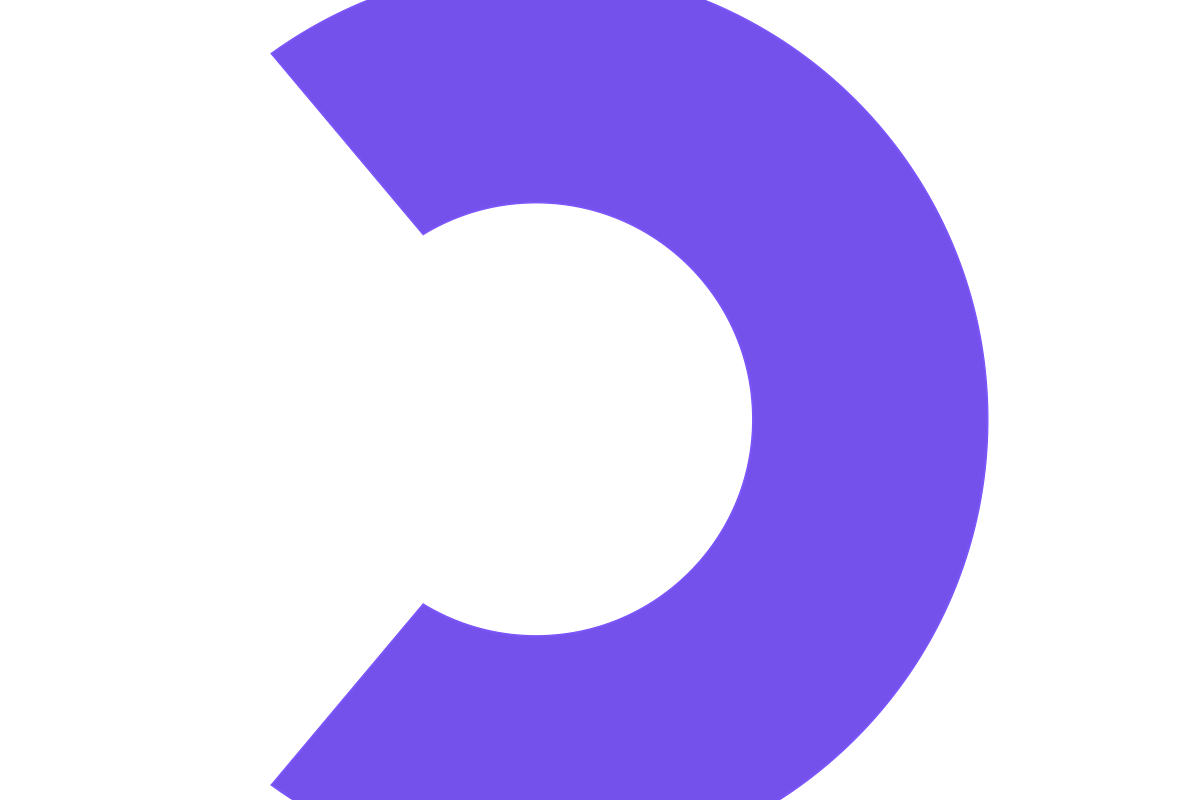

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

from utils import *

# File system manangement
import os
import gc
import time

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Importing and describing dataset

 A breaf explanation of the data and it's organization in different files can be seen in the following image:
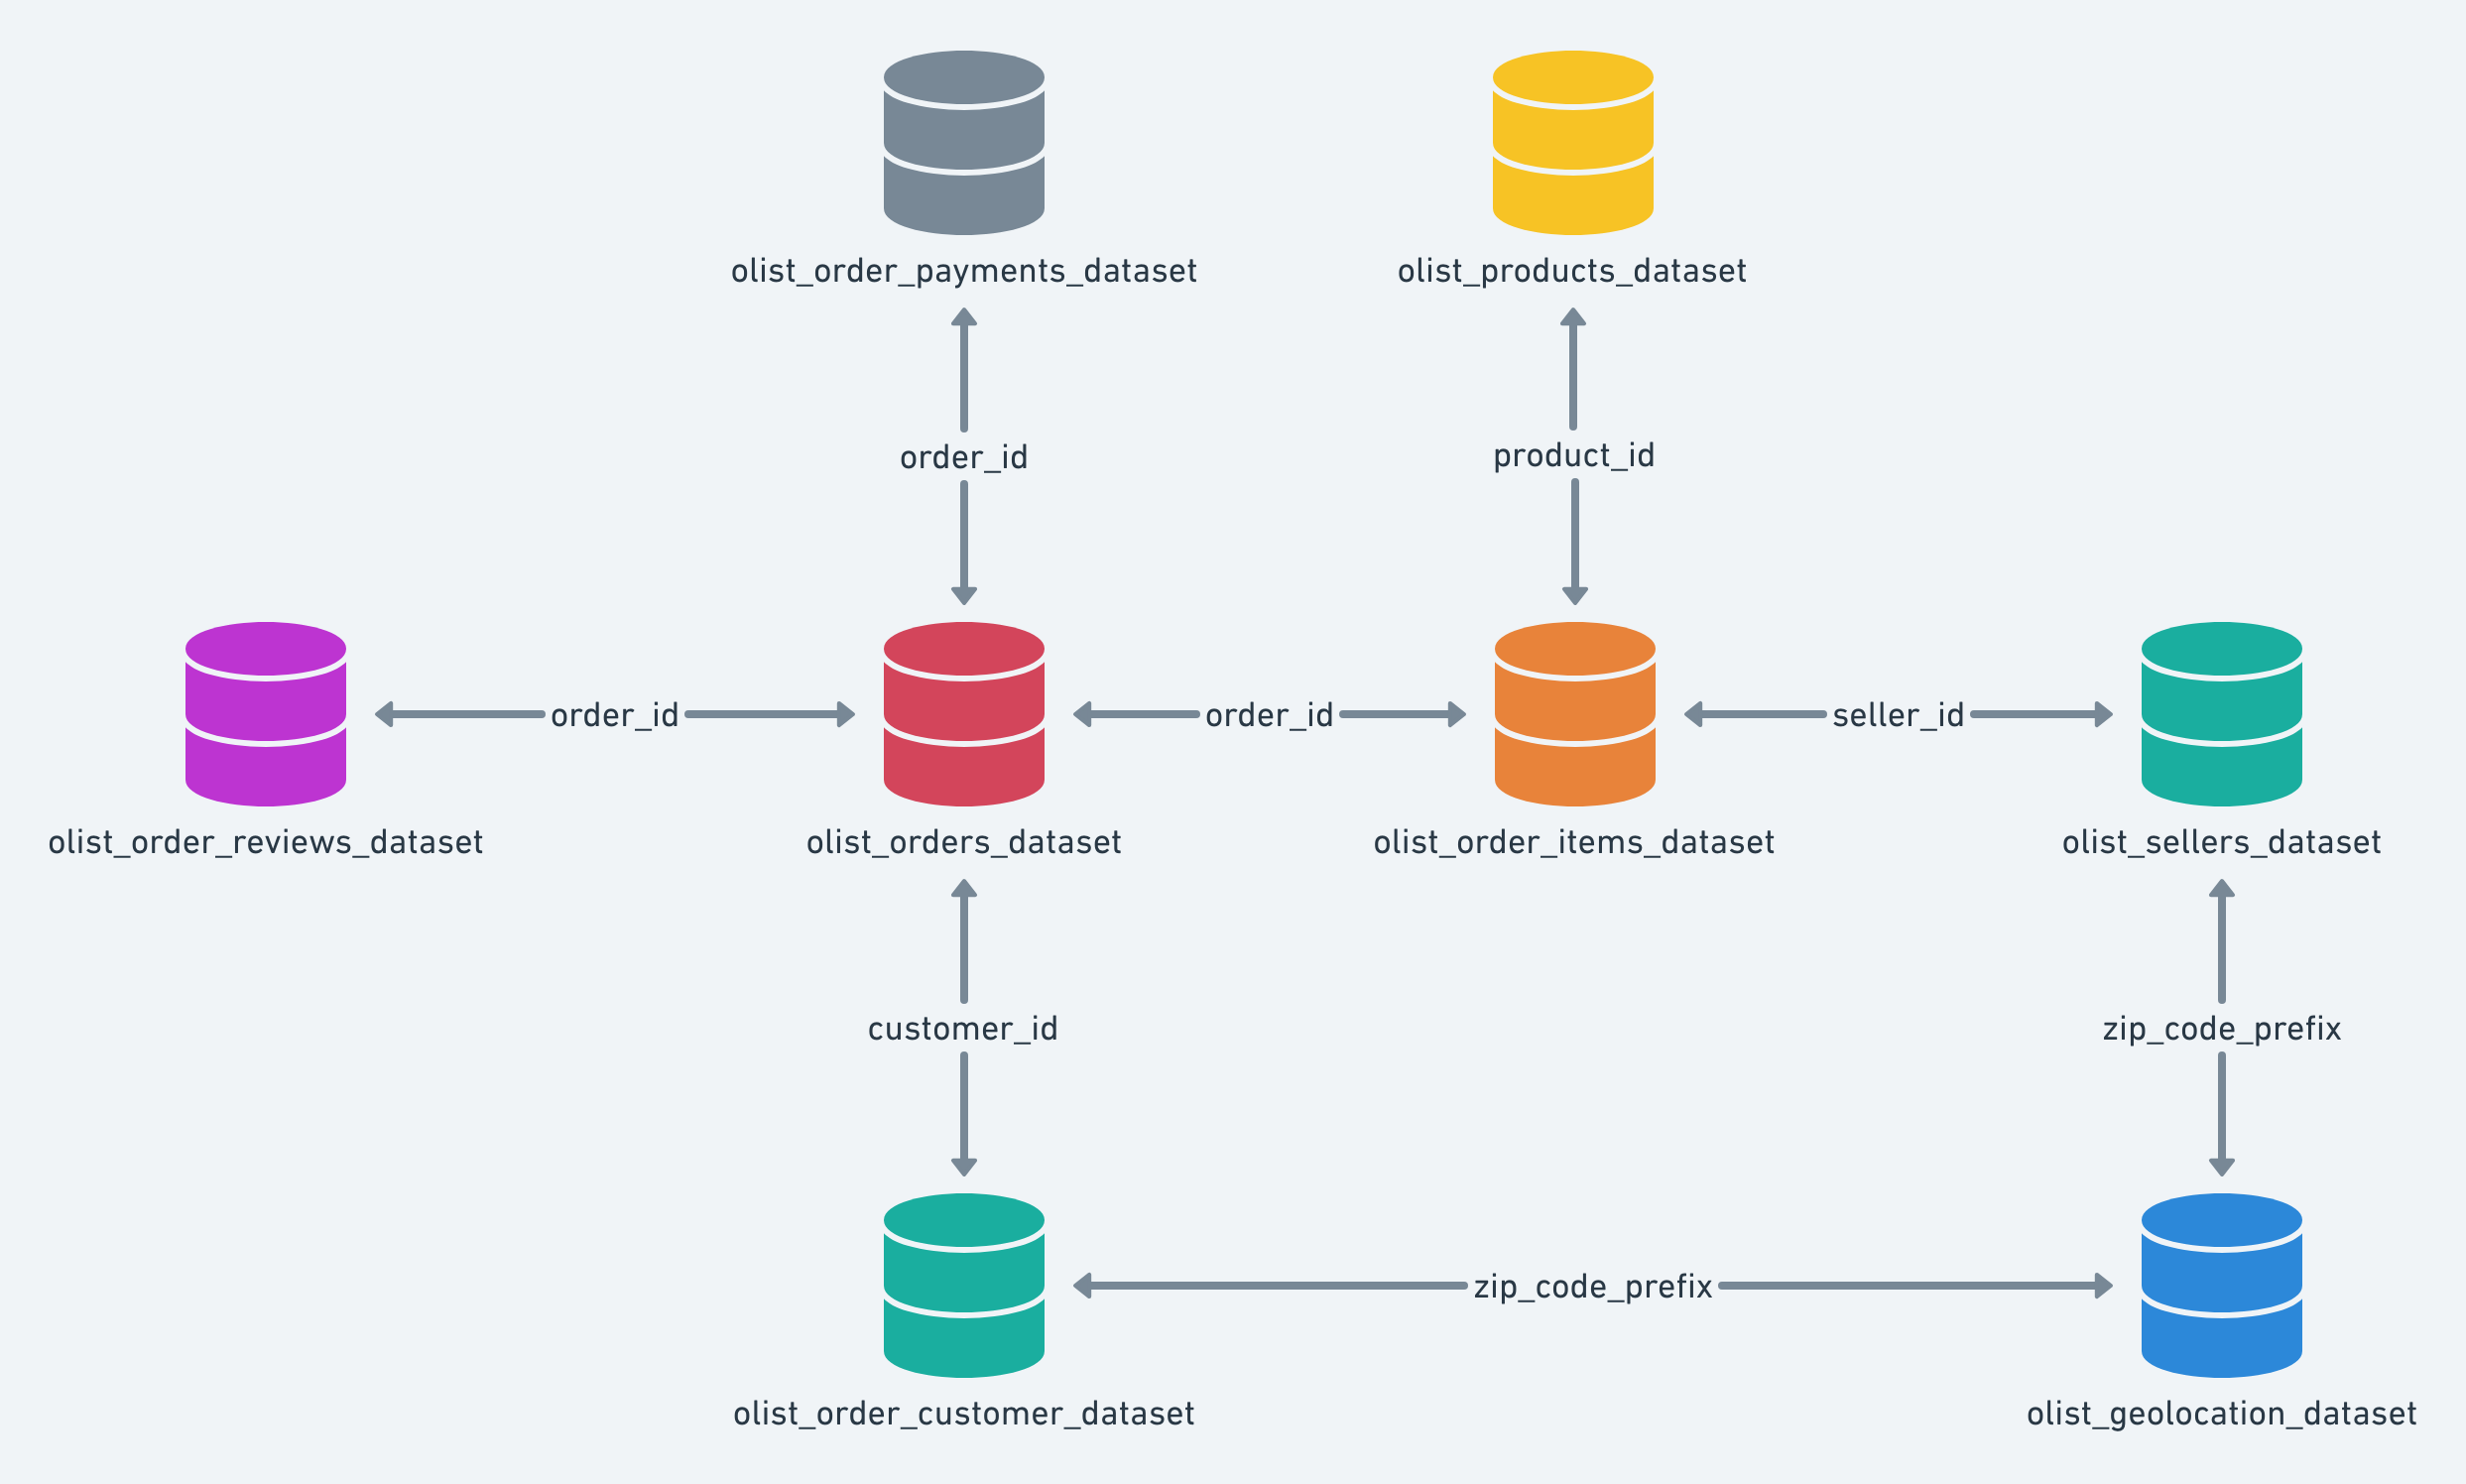

Know we list the different files in our data folder. 

In [2]:
# List files available
for file in os.listdir("data/"):
    if (file!='.DS_Store') & (file!='HRhd2Y0.png'):
        print(file)

olist_sellers_dataset.csv
product_category_name_translation.csv
df_clients_with_poly.csv
df_clients_new.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
df_clients_original.csv
olist_customers_dataset.csv
df_clients.csv
olist_geolocation_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv


There are 9 files, 8 datasets and product_category_name_translation.csv, that we will see in future what it contains. Know load the files in dataframes.

In [3]:
olist_customers_dataset = pd.read_csv('data/olist_customers_dataset.csv')
olist_sellers_dataset = pd.read_csv('data/olist_sellers_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('data/olist_order_reviews_dataset.csv')
olist_order_items_dataset = pd.read_csv('data/olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv('data/olist_products_dataset.csv')
olist_geolocation_dataset = pd.read_csv('data/olist_geolocation_dataset.csv')
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
olist_orders_dataset = pd.read_csv('data/olist_orders_dataset.csv')
olist_order_payments_dataset = pd.read_csv('data/olist_order_payments_dataset.csv')

Describing the obtained data frames

In [4]:
datasets = [olist_customers_dataset,
            olist_sellers_dataset,
            olist_order_reviews_dataset,
            olist_order_items_dataset,
            olist_products_dataset,
            olist_geolocation_dataset,
            product_category_name_translation,
            olist_orders_dataset,
            olist_order_payments_dataset]
titles = ["customers",
          "sellers",
          "reviews",
          "items", 
          "products",
          "geolocations", 
          "category_translation",
          "payments", 
          "orders"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Blues')

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = pd.DataFrame({},)
new_df['dataset']= titles
new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Blues')

In [6]:
new_df.isnull().sum()

dataset               0
numeric_features      0
num_features_name     0
object_features       0
objt_features_name    0
bool_features         0
dtype: int64

Regarding the missing values in the datasets

In [7]:
print('olist_customers_dataset')
missing_values_table(olist_customers_dataset)
print('olist_sellers_dataset')
missing_values_table(olist_sellers_dataset)
print('olist_order_reviews_dataset')
missing_values_table(olist_order_reviews_dataset)
print('olist_order_items_dataset')
missing_values_table(olist_order_items_dataset)
print('olist_products_dataset')
missing_values_table(olist_products_dataset)
print('olist_geolocation_dataset')
missing_values_table(olist_geolocation_dataset)
print('product_category_name_translation')
missing_values_table(product_category_name_translation)
print('olist_orders_dataset')
missing_values_table(olist_orders_dataset)
print('olist_order_payments_dataset')
missing_values_table(olist_order_payments_dataset)

olist_customers_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

olist_sellers_dataset
Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

olist_order_reviews_dataset
Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
review_comment_title             87656               88.3
review_comment_message           58247               58.7

olist_order_items_dataset
Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

olist_products_dataset
Your selected dataframe has 9 columns.
There are 8 columns that have missing values.


Missing Values  % of Total Values
product_category_name                  610                1.9
product_name_lenght                    610                1.9
product_description_lenght             610                1.9
product_photos_qty                     610                1.9
product_weight_g                         2                0.0
product_length_cm                        2                0.0
product_height_cm                        2                0.0
product_width_cm                         2                0.0

olist_geolocation_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

product_category_name_translation
Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

olist_orders_dataset
Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
order_delivered_customer_date            2965                3.0
order_delivered_carrier_date             1783                1.8
order_approved_at                         160                0.2

olist_order_payments_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Observe the following 3 datasets contains missing values: ***olist_order_reviews_dataset, olist_products_dataset, olist_orders_dataset***

First we start to regard how it looks the olist_customers_dataset comprising the following features:

 - customer_id: key to the orders dataset. Each order has a unique customer_id.
 - customer_unique_id: unique identifier of a customer. We need to say that here each order is assigned to a customer_id, meaning the same customer has different ids for different orders.
 - customer_zip_code_prefix: first five digits of customer zip code.
 - customer_city: customer city name.
 - customer_state: customer state.

In [8]:
olist_customers_dataset.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [9]:
olist_customers_dataset.shape

(99441, 5)

There are 2 id columns and other 3 columns that we analyse next.

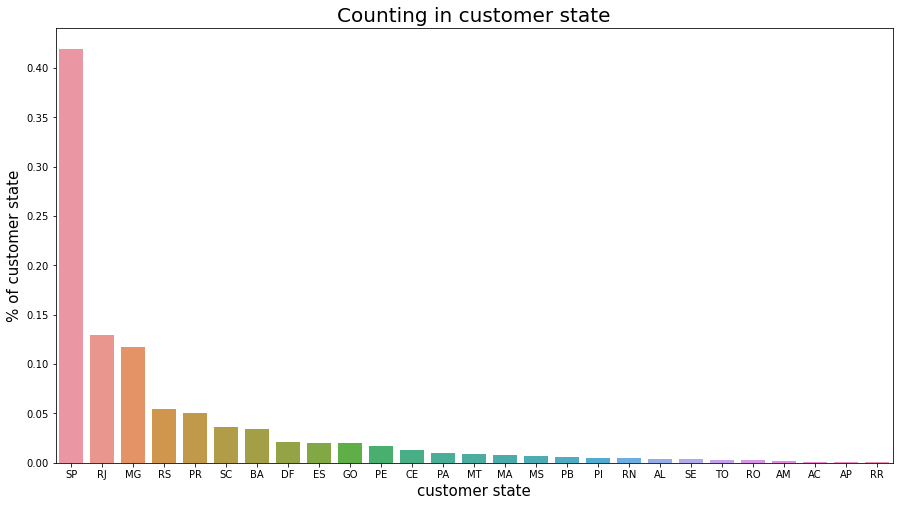

In [10]:
plot_count_col(olist_customers_dataset, col= 'customer_state', label_col='customer state')

In [11]:
len(olist_customers_dataset.customer_state.unique())

27

As we can see, the most number of customer come from state code `SP`, followed by `RJ` and `MG`, which are all situated in the SouthEast region of Brazil.

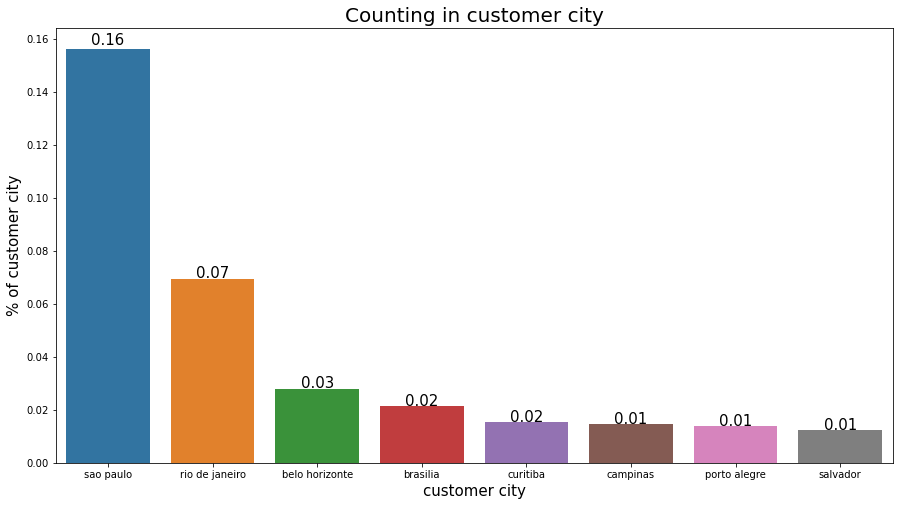

In [12]:
plot_count_col(olist_customers_dataset, col= 'customer_city', label_col='customer city', top=8, show_val=True)

Next we regard how it looks the olist_sellers_dataset.

In [13]:
olist_sellers_dataset.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [14]:
olist_sellers_dataset.shape

(3095, 4)

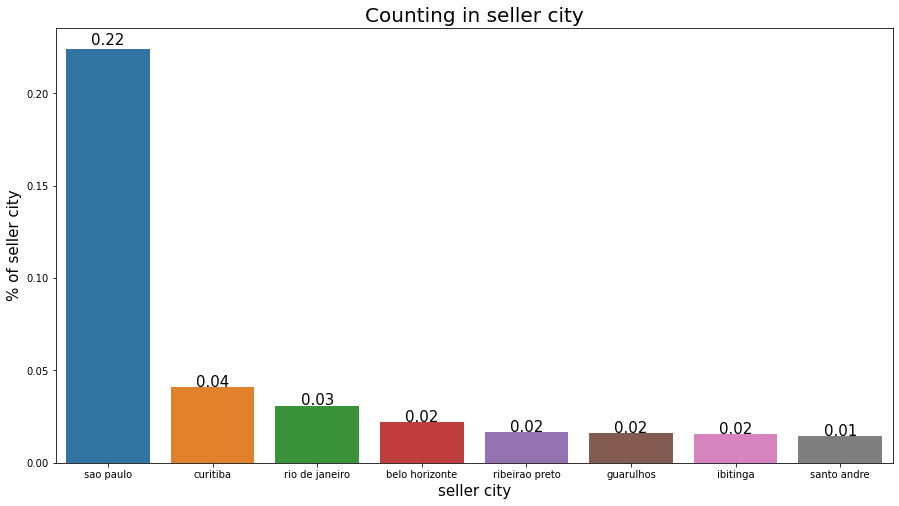

In [15]:
plot_count_col(olist_sellers_dataset, col= 'seller_city', label_col='seller city', top=8, show_val=True)

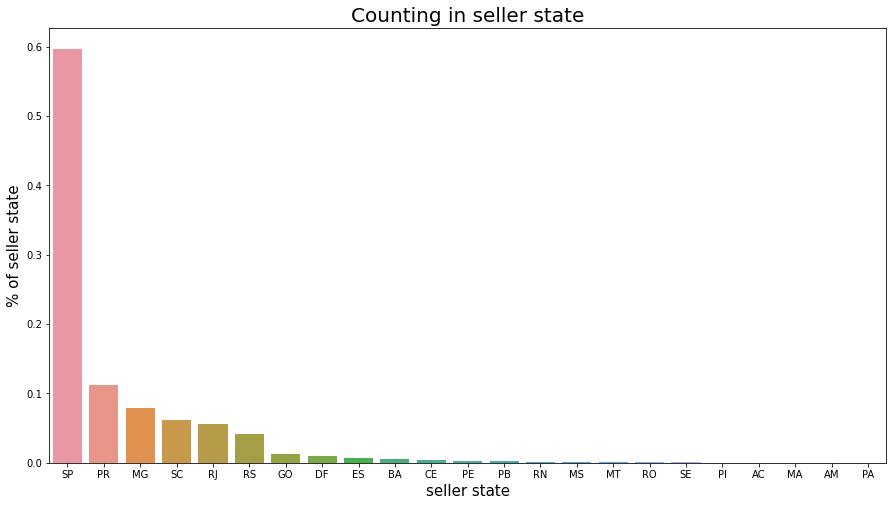

In [16]:
plot_count_col(olist_sellers_dataset, col= 'seller_state', label_col='seller state', show_val=False)

Next we regard how it looks the olist_orders_dataset that contains the following features:

 - order_id: unique identifier of the order.
 - customer_id: key to the customer dataset. Each order has a unique customer_id.
 - order_status: reference to the order status (delivered, shipped, etc).
 - order_purchase_timestamp: shows the purchase timestamp.
 - order_approved_at: shows the payment approval timestamp.
 - order_delivered_carrier_date: shows the order posting timestamp. When it was handled to the logistic partner.
 - order_delivered_customer_date: shows the actual order delivery date to the customer.
 - order_estimated_delivery date: shows the estimated delivery date that was informed to customer at the purchase moment.

In [17]:
olist_orders_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [18]:
olist_orders_dataset.shape

(99441, 8)

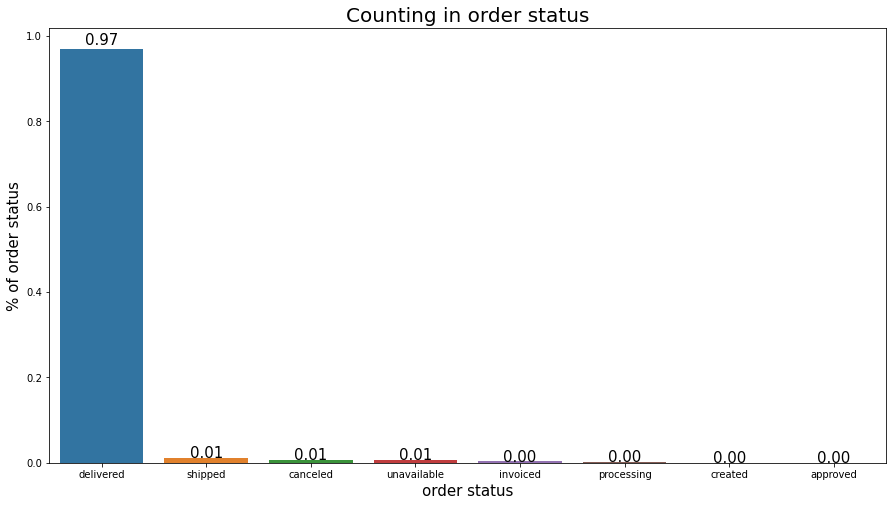

In [19]:
plot_count_col(olist_orders_dataset, col= 'order_status', label_col='order status', show_val=True)

The reviews dataset with the following features:
 - review_id: unique review identifier.
 - order_id: unique order identifier.
 - review_score: note ranging from 1 to 5 given by the customer on a satisfaction survey.
 - review_comment_title: comment title from the review left by the customer, in Portuguese.
 - review_comment_message: comment message from the review left by the customer, in Portuguese.
 - review_creation_date: shows the date in which the satisfaction survey was sent to the customer.
 - review_answer_timestamp: shows satisfaction survey answer timestamp.
 
is now analysed.

In [20]:
olist_order_reviews_dataset.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [21]:
olist_order_reviews_dataset.shape

(99224, 7)

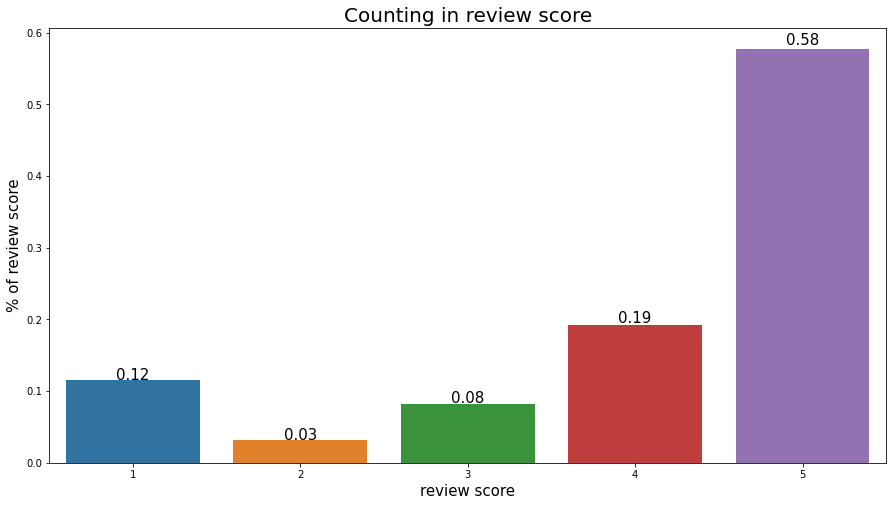

In [22]:
plot_count_col(olist_order_reviews_dataset, col= 'review_score', label_col='review score', show_val=True)

We can see, most customers are satisfied with the service and have given 4 and 5 ratings accordingly. 
However we can see many customers have given a raitng of 1, which means that they are dissapointed with the service.

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
review_comment_title             87656               88.3
review_comment_message           58247               58.7

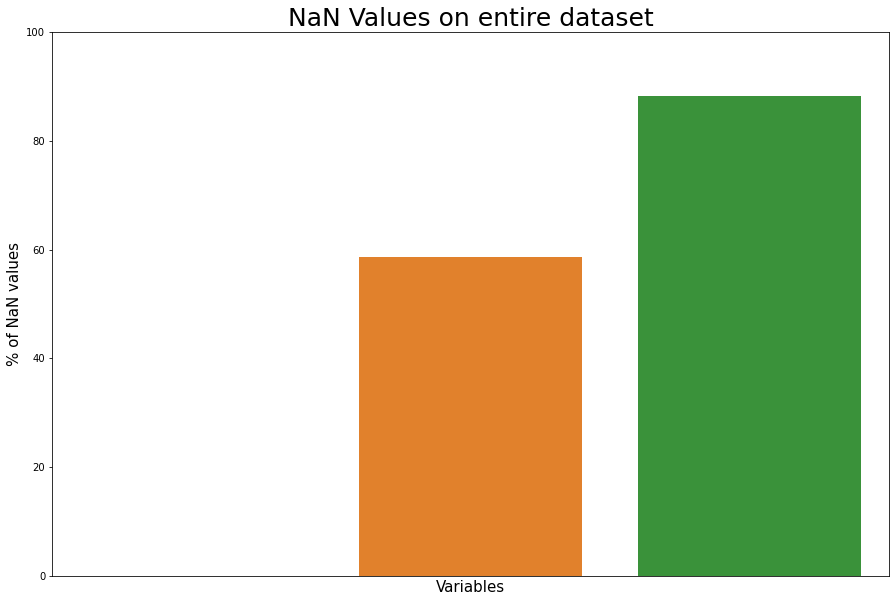

In [23]:
plot_nan_in_pourcent_from_data(olist_order_reviews_dataset)
# Missing values statistics
missing_values = missing_values_table(olist_order_reviews_dataset)
missing_values.head()

In [24]:
olist_order_items_dataset.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [25]:
olist_order_items_dataset.shape

(112650, 7)

The product dataset with the following 9 features is also analysed:

 - product_id: unique product identifier.
 - product_category_head: root category of product, in Portuguese..
 - product_name_length: number of characters extracted from the product name.
 - product_description_lenght: number of characters extracted from the product description.
 - product_photos_qty: number of product published photos.
 - product_weight_g: product weight measured in grams.
 - product_length_cm: product length measured in centimeters.
 - product height_cm: product height measured in centimeters.
 - product_width_cm: product width measured in centimeters.

In [26]:
olist_products_dataset.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [27]:
olist_products_dataset.shape

(32951, 9)

Your selected dataframe has 9 columns.
There are 8 columns that have missing values.


Missing Values  % of Total Values
product_category_name                  610                1.9
product_name_lenght                    610                1.9
product_description_lenght             610                1.9
product_photos_qty                     610                1.9
product_weight_g                         2                0.0

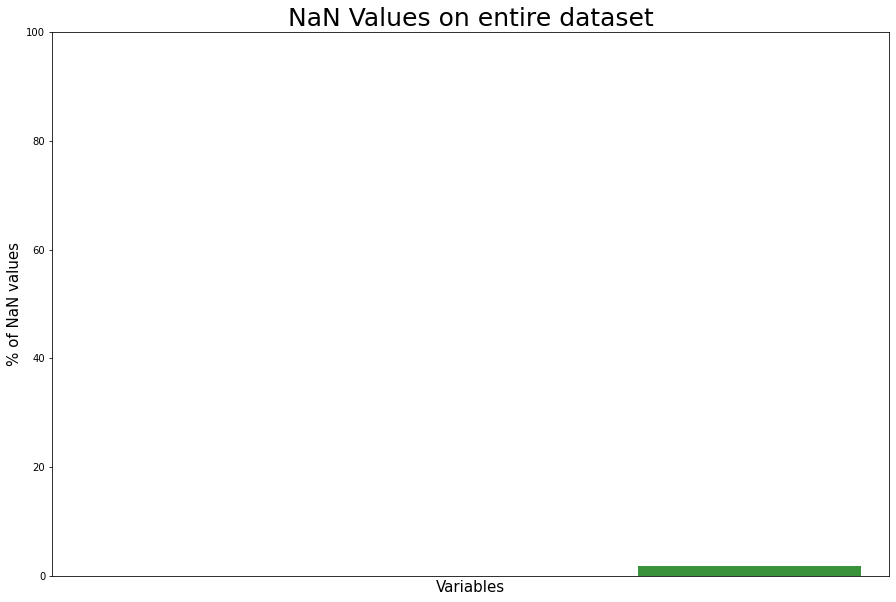

In [28]:
plot_nan_in_pourcent_from_data(olist_products_dataset)
# Missing values statistics
missing_values = missing_values_table(olist_products_dataset)
missing_values.head()

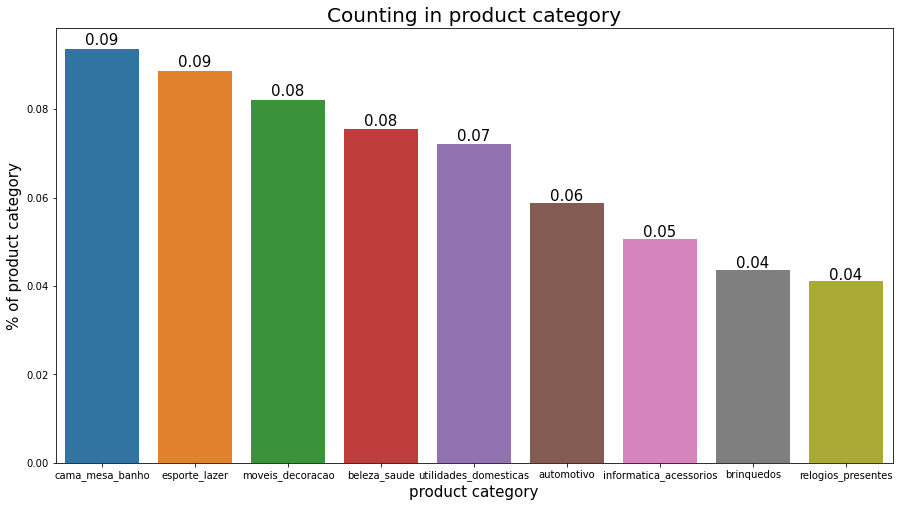

In [29]:
plot_count_col(olist_products_dataset, col= 'product_category_name', label_col='product category', top=9, show_val=True)

In [30]:
olist_products_dataset.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

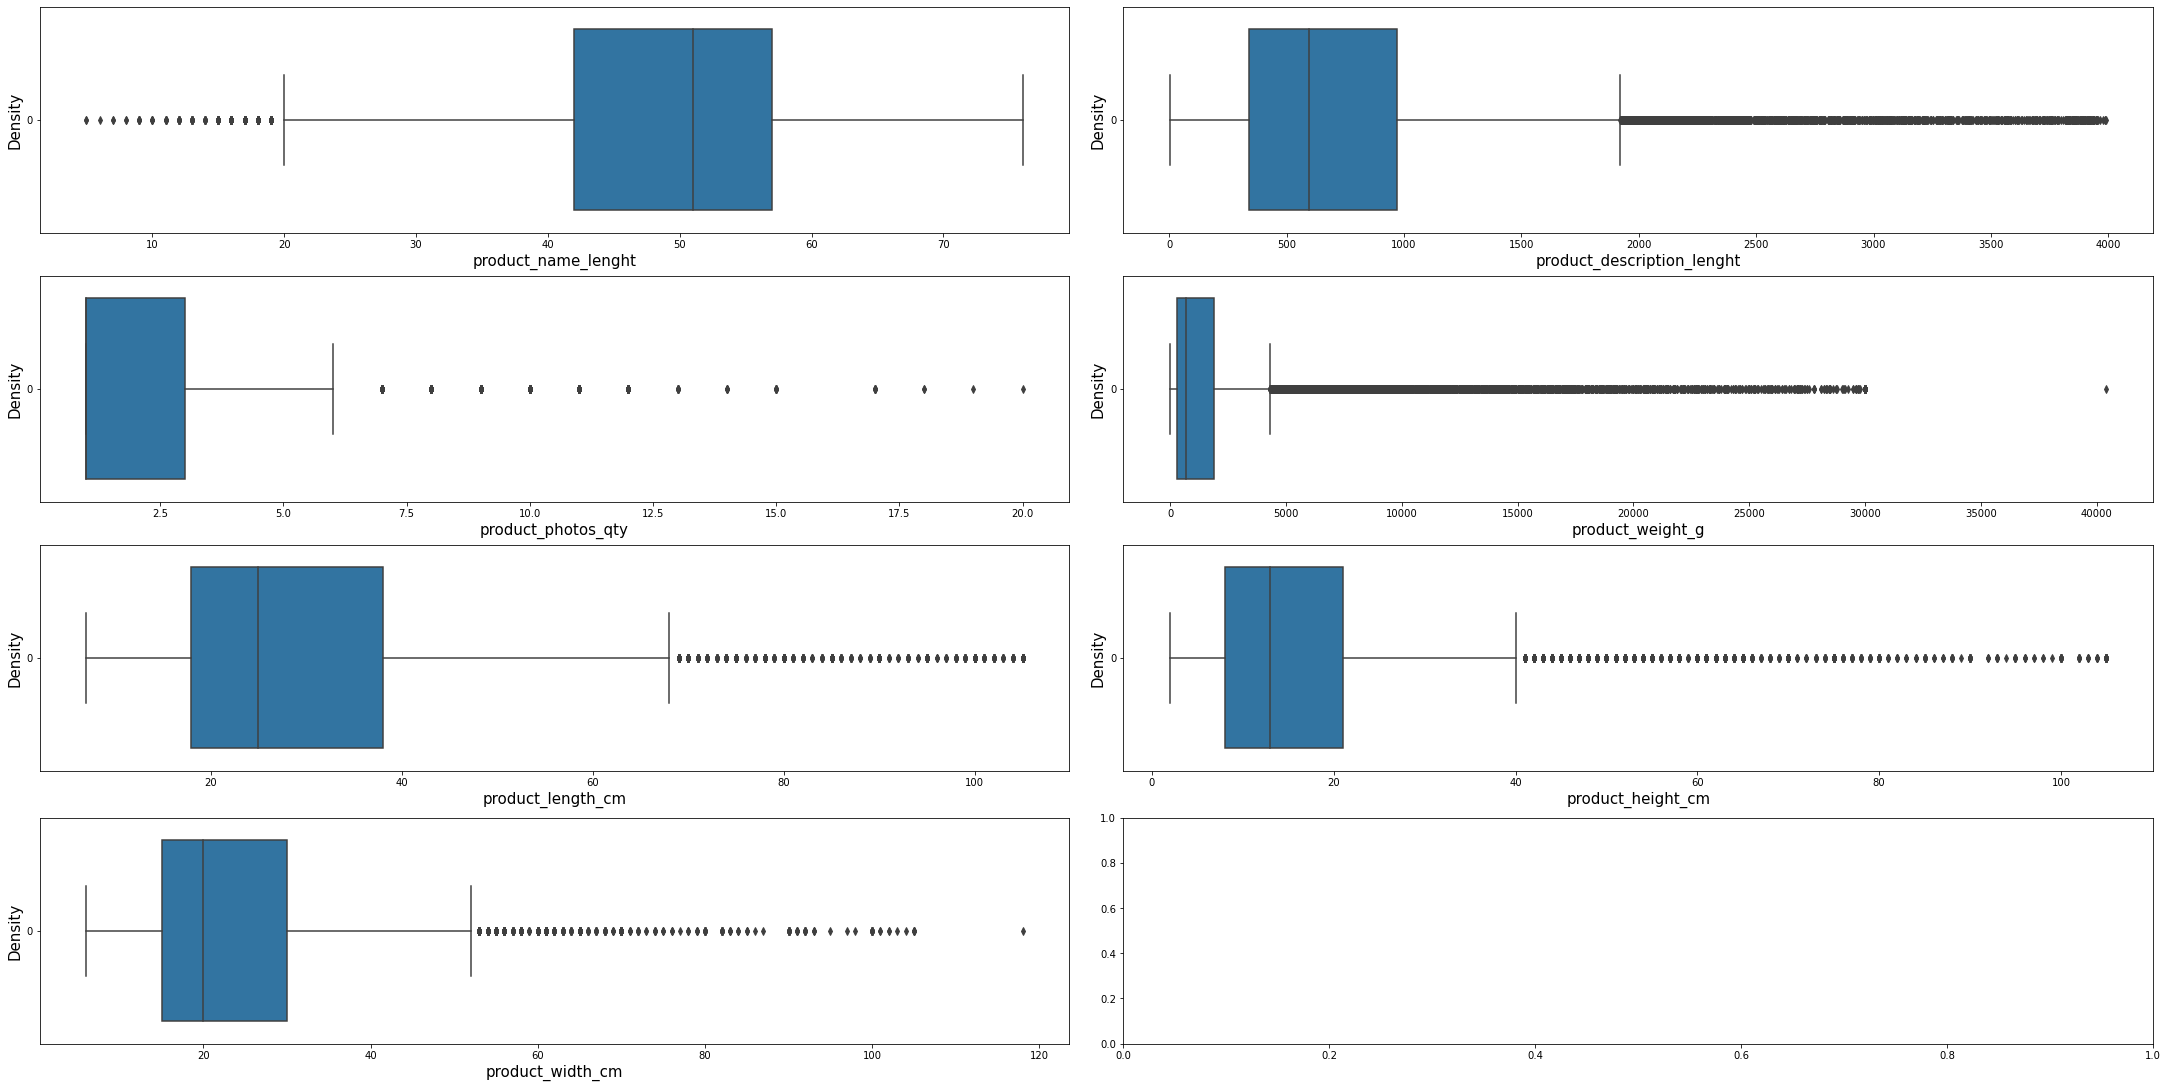

In [31]:
cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
        'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
plot_density(olist_products_dataset, columns = cols, dt = DensityTypes.Boxplot)

Know see the geolocation dataset with the following feature:
 - geolocation_zip_code_prefix: first 5 digits of zip code.
 - geolocation_lat: latitude
 - geolocation_lng: longitude
 - geolocation_city: city
 - geolocation_state state

In [32]:
olist_geolocation_dataset.head()
olist_geolocation_dataset.shape

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

(1000163, 5)

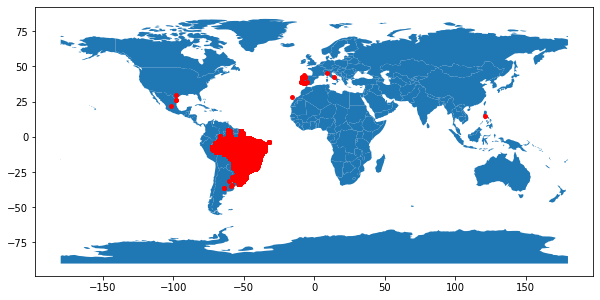

In [33]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(olist_geolocation_dataset['geolocation_lng'], olist_geolocation_dataset['geolocation_lat'])]
gdf = GeoDataFrame(olist_geolocation_dataset, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15, figsize=(15,8));

We can see, most of the orders come from Brazilian cities, however, there are a few orders which come from North America, Europe, and Asia.

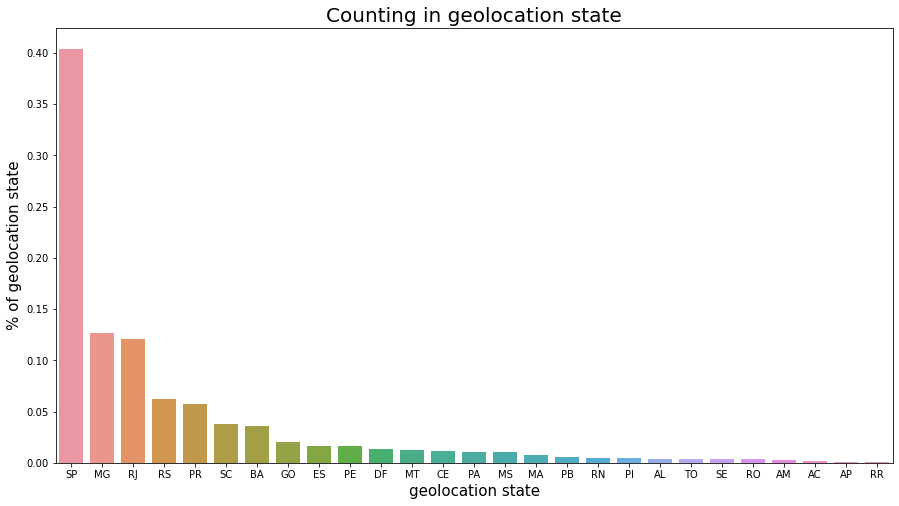

In [34]:
plot_count_col(olist_geolocation_dataset, col= 'geolocation_state', label_col='geolocation state')

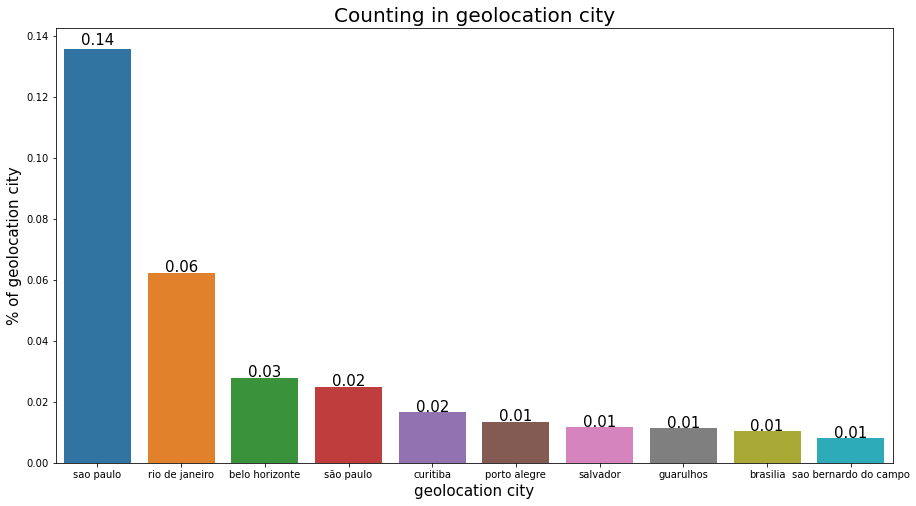

In [35]:
plot_count_col(olist_geolocation_dataset, col= 'geolocation_city', label_col='geolocation city', top=10, show_val=True)

In [36]:
product_category_name_translation.head()
product_category_name_translation.shape

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

(71, 2)

And the payments dataset: 
 - order_id: unique identifier of an order.
 - payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created.
 - payment_type: method of payment chosen by the customer.
 - payment_installments: number of installments chosen by the customer.
 - payment_value: transaction value.

In [37]:
olist_order_payments_dataset.head()
olist_order_payments_dataset.shape

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

(103886, 5)

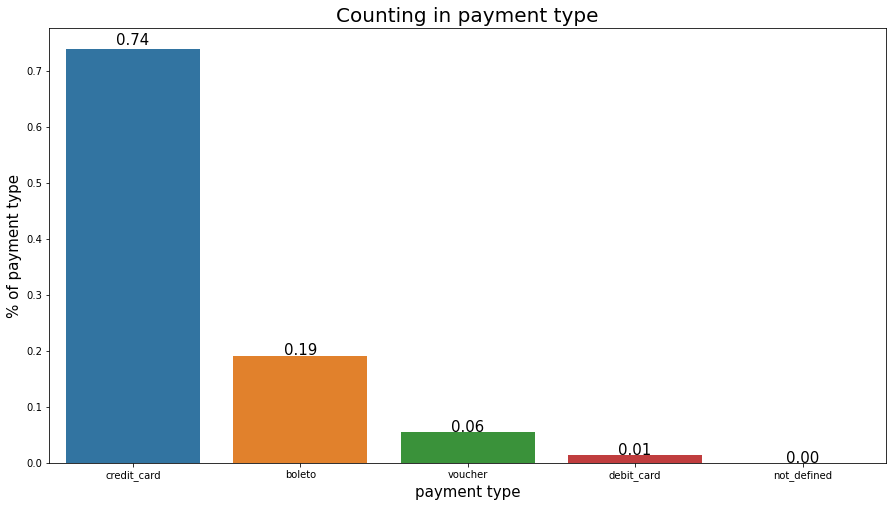

In [38]:
plot_count_col(olist_order_payments_dataset, col= 'payment_type', label_col='payment type', show_val=True)

In [39]:
olist_order_payments_dataset.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

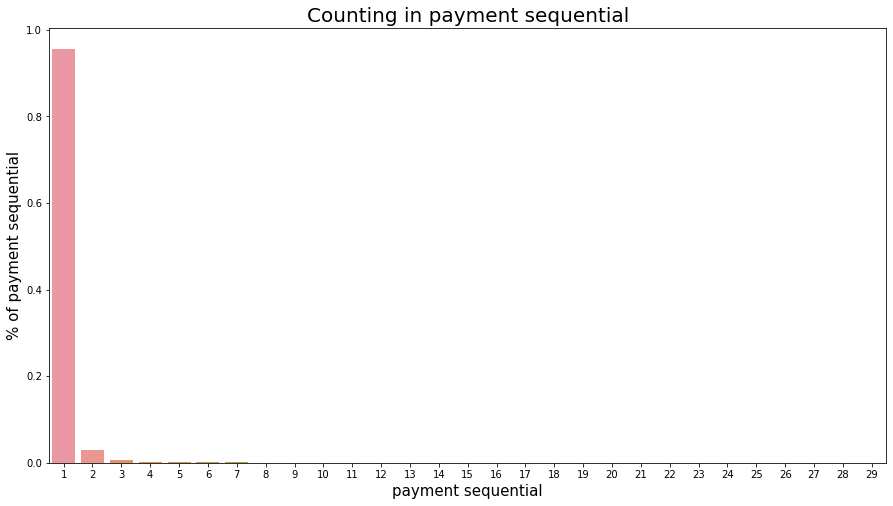

In [40]:
plot_count_col(olist_order_payments_dataset, col= 'payment_sequential', label_col='payment sequential', show_val=False)

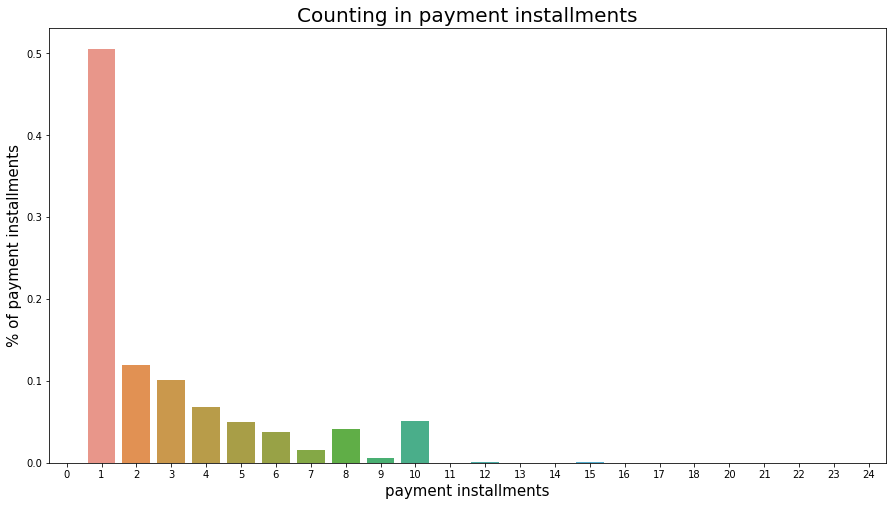

In [41]:
plot_count_col(olist_order_payments_dataset, col= 'payment_installments', label_col='payment installments', show_val=False)

In [42]:
olist_order_payments_dataset[olist_order_payments_dataset.payment_installments==0]

order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94

Theese values with 0 installments seem strange for me, therefore I prefer to delete them in cleaning the datasets.

# Cleaning the datasets

First we can look for some duplicates.
Starting with `olist_order_items_dataset` dataset we observe:

In [13]:
olist_order_items_dataset[olist_order_items_dataset[['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']].duplicated()]
olist_order_items_dataset[olist_order_items_dataset.order_id == '0008288aa423d2a3f00fcb17cd7d8719']

order_id  order_item_id  \
14      0008288aa423d2a3f00fcb17cd7d8719              2   
33      00143d0f86d6fbd9f9b38ab440ac16f5              2   
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
43      001ab0a7578dd66cd4b0a71f5b6e1e41              2   
44      001ab0a7578dd66cd4b0a71f5b6e1e41              3   
...                                  ...            ...   
112617  ffecd5a79a0084f6a592288c67e3c298              3   
112635  fff8287bbae429a99bb7e8c21d151c41              2   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
14      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
33      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
43      0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
44      0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
...                                  ...                               ...   
112617  50fd2b788dc166edd20512370dac54df  8b321bb669392f5163d04c59e235e066   
112635  bee2e070c39f3dd2f6883a17a5f0da45  4e922959ae960d389249c378d1c939f5   
112641  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112642  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112643  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   

        shipping_limit_date   price  freight_value  
14      2018-02-21 02:55:52   49.90          13.37  
33      2017-10-20 16:07:52   21.33          15.10  
34      2017-10-20 16:07:52   21.33          15.10  
43      2018-01-04 02:33:42   24.89          17.63  
44      2018-01-04 02:33:42   24.89          17.63  
...                     ...     ...            ...  
112617  2018-03-05 20:15:27   21.90          15.79  
112635  2018-03-27 12:29:22  180.00          48.14  
112641  2017-11-03 02:55:58   55.00          34.19  
112642  2017-11-03 02:55:58   55.00          34.19  
112643  2017-11-03 02:55:58   55.00          34.19  

[10225 rows x 7 columns]

order_id  order_item_id  \
13  0008288aa423d2a3f00fcb17cd7d8719              1   
14  0008288aa423d2a3f00fcb17cd7d8719              2   

                          product_id                         seller_id  \
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   

    shipping_limit_date  price  freight_value  
13  2018-02-21 02:55:52   49.9          13.37  
14  2018-02-21 02:55:52   49.9          13.37

This data contains clearly duplicates and need to be cleaned, keeping the last values.

In [14]:
olist_order_items_dataset.shape

(112650, 7)

In [15]:
olist_order_items_dataset = olist_order_items_dataset.drop_duplicates(['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'], keep='last')

In [16]:
olist_order_items_dataset.shape

(102425, 7)

Observe that more about 10000 values were deleted being considered as duplicates in this dataset. Verifying other datasets we have not noticed some duplicates.

We observe nan values in `olist_products_dataset` more preciselly in `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty` with 610 nan values that consists 1.9% of nan values. `product_weight_g` has 2 values of nans. I will remove this data observations.

In [17]:
olist_products_dataset = olist_products_dataset.dropna()

Also an english translation for `product_categories_name` is made for more coprehension. But first we add two values that does not contain translation in the translation dataset.

In [18]:
new_row1 = {'product_category_name':'pc_gamer', 'product_category_name_english':'pc_gamer'}
new_row2 = {'product_category_name':'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english':'kitchen_food_preparators'}
#append row to the dataframe
product_category_name_translation = product_category_name_translation.append(new_row1, ignore_index=True)
product_category_name_translation = product_category_name_translation.append(new_row2, ignore_index=True)
del new_row1, new_row2

In [19]:
dict_translation = product_category_name_translation.T.to_dict()
new_transl = {}
for d in dict_translation.keys():
    es = dict_translation[d]['product_category_name']
    en = dict_translation[d]['product_category_name_english']
    new_transl[es] = en

In [20]:
olist_products_dataset['product_category_name_en'] = olist_products_dataset['product_category_name'].map(new_transl)
del product_category_name_translation

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
olist_products_dataset[olist_products_dataset['product_category_name_en'].isna()][['product_category_name', 'product_category_name_en']]

Empty DataFrame
Columns: [product_category_name, product_category_name_en]
Index: []

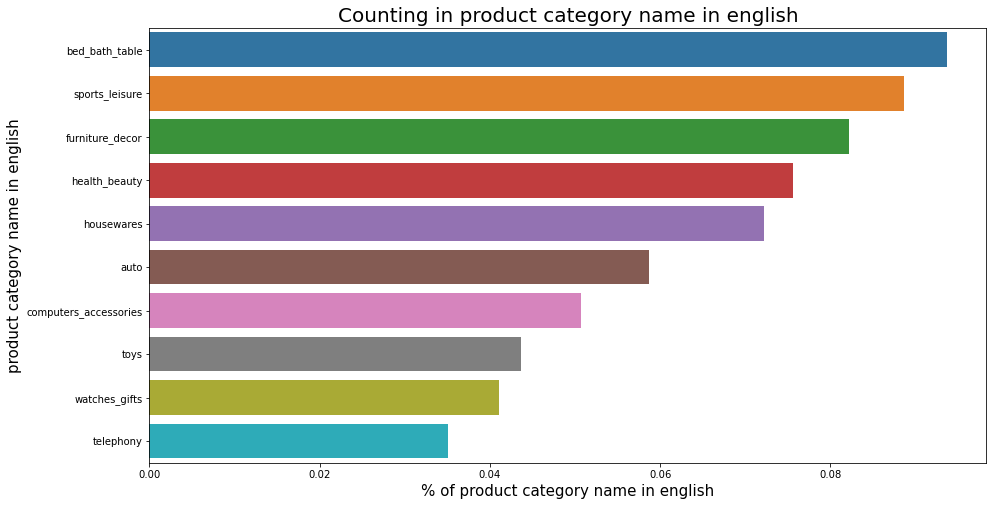

In [22]:
plot_count_col(olist_products_dataset, col= 'product_category_name_en', label_col='product category name in english', show_val=False, on_x=False, top=10)

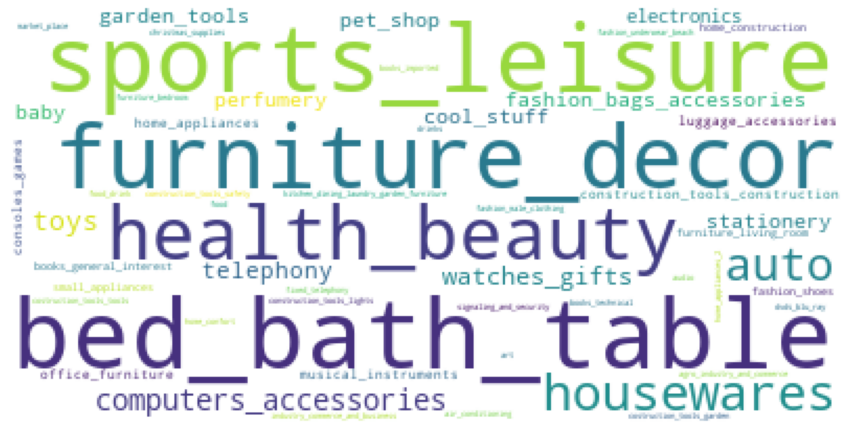

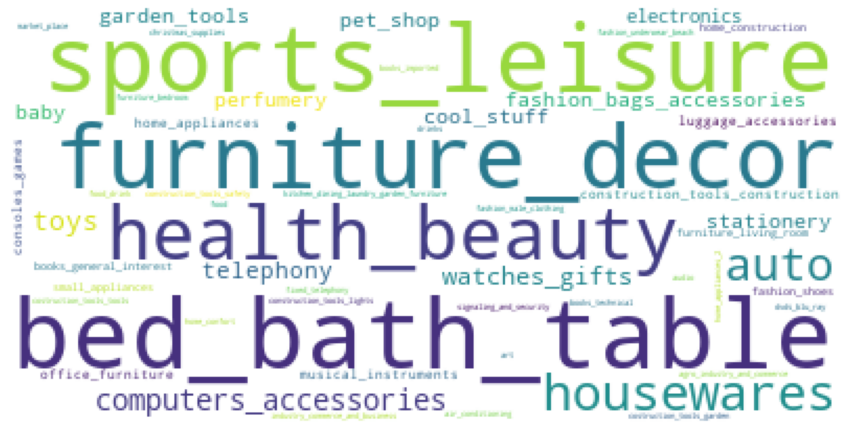

In [23]:
plot_words(olist_products_dataset, 'product_category_name_en')

In [24]:
olist_products_dataset.product_category_name_en.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [30]:
categories ={
    'electronics':['electronics'],
    'computers' : ['pc_gamer',  'tablets_printing_image', 'computers_accessories',  'computers', 'consoles_games'],
    'kitchen_electronics': ['kitchen_food_preparators', 'small_appliances_home_oven_and_coffee'],
    'telephony' : ['telephony', 'stationery',  'fixed_telephony'], 
    'personal_care' : ['diapers_and_hygiene', 'perfumery', 'health_beauty'],
    'furniture':['furniture_mattress_and_upholstery','furniture_bedroom','furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'office_furniture'], 
    'flowers':['flowers'],
    'art': ['arts_and_craftmanship', 'art'],
    'home_layout': [ 'home_comfort_2', 'home_confort',   'home_appliances', 'bed_bath_table', 'air_conditioning',  'home_appliances_2'],
    'security': ['security_and_services', 'signaling_and_security'],
    'dressing' : ['fashion_childrens_clothes', 'fashion_sport', 'fashio_female_clothing', 'sports_leisure', 'housewares', 'fashion_shoes',  'fashion_underwear_beach', 'fashion_male_clothing'],
    'baby' : ['baby', 'toys'],
    'hobies_learn' : ['cds_dvds_musicals', 'cine_photo', 'dvds_blu_ray', 'books_imported', 'music', 'audio', 'musical_instruments', 'cool_stuff', 'books_general_interest', 'books_technical'],
    'tools' : [  'garden_tools', 'small_appliances', ],
    'construction':['costruction_tools_garden', 'construction_tools_safety','home_construction', 'construction_tools_construction', 'costruction_tools_tools', 'construction_tools_lights'], 
    'accessories' : ['luggage_accessories', 'fashion_bags_accessories', 'watches_gifts'],
    'auto' : ['auto'],
    'animals' : ['pet_shop'],
    'commerce': ['agro_industry_and_commerce', 'industry_commerce_and_business', 'party_supplies', 'drinks', 'market_place', 'la_cuisine', 'food_drink', 'food', 'christmas_supplies']
}

In [31]:
def replace(df, col, key, val):
    m = [v == key for v in df[col]]
    df.loc[m, col] = val
    return df

In [32]:
olist_products_dataset['my_categoty'] = olist_products_dataset['product_category_name_en'].str.lower();
for new_value, old_value in categories.items():
    olist_products_dataset['my_categoty'] = olist_products_dataset['my_categoty'].replace(old_value, new_value);

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
len(olist_products_dataset[olist_products_dataset['my_categoty'].isna()])

0

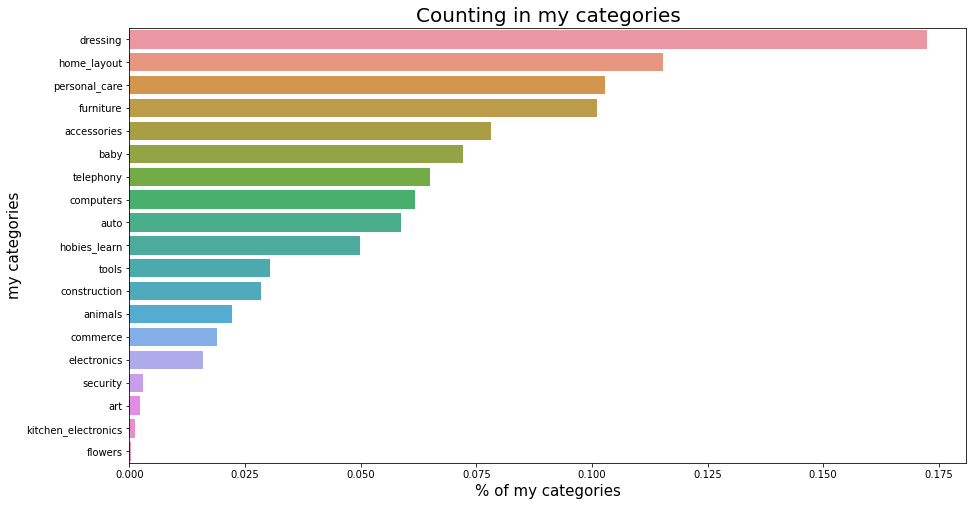

In [34]:
plot_count_col(olist_products_dataset, col= 'my_categoty', label_col='my categories', show_val=False, on_x=False)

We observed `olist_order_payments_datase`, has non defined `payment_type`, therefore we will eliminate theese values.

In [35]:
# removing not_defined payment method
olist_order_payments_dataset = olist_order_payments_dataset.loc[olist_order_payments_dataset['payment_type']!='not_defined', :]

In [36]:
olist_order_payments_dataset = olist_order_payments_dataset[olist_order_payments_dataset.payment_installments != 0]

We saw that `olist_order_reviews_datase` contains two columns with lots of nan values. We choose to eliminate theese columns.

In [37]:
# dropping columns with many missing values
olist_order_reviews_dataset = olist_order_reviews_dataset.drop(columns=['review_comment_title', 'review_comment_message'])

Take only the ordrers that were delivered.

In [38]:
olist_orders_dataset = olist_orders_dataset[olist_orders_dataset.order_status=='delivered']

We don't have lot of missing values in `olist_orders_dataset`, therefore we remove rows which have missing values using the dropna() function.

In [39]:
# dropping the missing values
olist_orders_dataset = olist_orders_dataset.dropna()

In [40]:
# convert date to datetime format
olist_orders_dataset[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']] = olist_orders_dataset[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']]\
        .apply(lambda x: pd.to_datetime(x,errors = 'coerce', format='%Y-%m-%d %H:%M:%S'))\
        .apply(lambda x: x.dt.date)\
        .astype('datetime64')

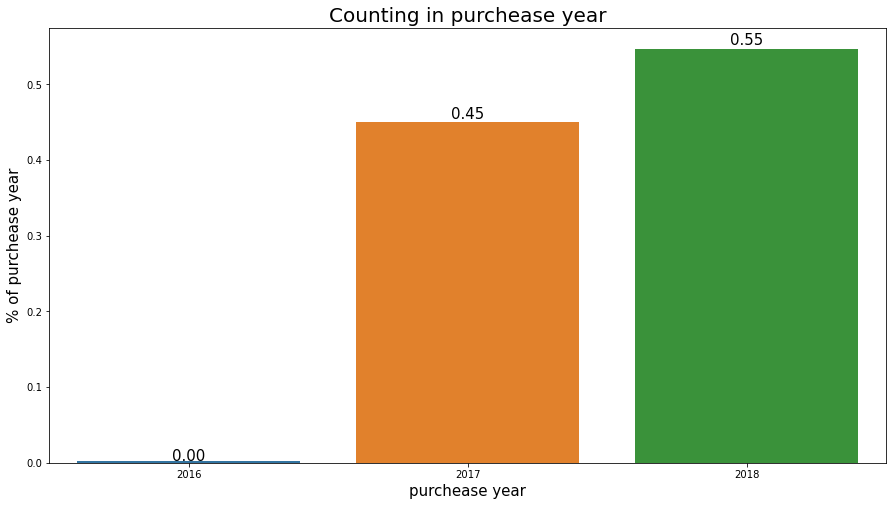

In [41]:
olist_orders_dataset['purchease_year'] = olist_orders_dataset.order_purchase_timestamp.dt.year
plot_count_col(olist_orders_dataset, col= 'purchease_year', label_col='purchease year', show_val=True)

In [42]:
#olist_orders_dataset[olist_orders_dataset.purchease_year==2016]

A small number of purcheases are made in 2016, Therefore we will not consider theese data.

In [43]:
#olist_orders_dataset = olist_orders_dataset[olist_orders_dataset.purchease_year!=2016]

# Feature engineering on separate datasets
Next, we engineer the following features:

 - diff_app_pur: the difference between the time the order was placed and the time it was approved in seconds
 - diff_car_app: the difference between the time the order was approved and the time the order was delivered to the logistic partner in days
 - diff_del_car: the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days
 - diff_est_act: the difference between the estimated date of arrival and the actual date of arrival in days

Also regarding the RFM segmentation we can imagine some features like:
 - Recency : number of days after the last purchase of the client
 - Frequency : number of purchases of the customer
 - Monetary : average amount of customer purchases

Here Recency will be computed as 
 - diff_cust_pur: the difference between the time the order was made and the current date

In [44]:
from datetime import datetime as dt
olist_orders_dataset.loc[:,'diff_app_pur'] = (pd.to_datetime(olist_orders_dataset.order_approved_at) - pd.to_datetime(olist_orders_dataset.order_purchase_timestamp)).dt.seconds
olist_orders_dataset.loc[:,'diff_car_app'] = (pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date) - pd.to_datetime(olist_orders_dataset.order_approved_at)).dt.days
olist_orders_dataset.loc[:,'diff_del_car'] = (pd.to_datetime(olist_orders_dataset.order_delivered_customer_date) - pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date)).dt.days
olist_orders_dataset.loc[:,'diff_est_act'] = (pd.to_datetime(olist_orders_dataset.order_estimated_delivery_date) - pd.to_datetime(olist_orders_dataset.order_delivered_customer_date)).dt.days

from datetime import timedelta
last_date = olist_orders_dataset['order_purchase_timestamp'].max() + timedelta(days=1)
olist_orders_dataset.loc[:,'diff_cust_pur'] = (last_date - pd.to_datetime(olist_orders_dataset.order_purchase_timestamp)).dt.days

In [45]:
olist_orders_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered               2017-10-02        2017-10-02   
1    delivered               2018-07-24        2018-07-26   
2    delivered               2018-08-08        2018-08-08   
3    delivered               2017-11-18        2017-11-18   
4    delivered               2018-02-13        2018-02-13   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-10-04                    2017-10-10   
1                   2018-07-26                    2018-08-07   
2                   2018-08-08                    2018-08-17   
3                   2017-11-22                    2017-12-02   
4                   2018-02-14                    2018-02-16   

  order_estimated_delivery_date  purchease_year  diff_app_pur  diff_car_app  \
0                    2017-10-18            2017             0             2   
1                    2018-08-13            2018             0             0   
2                    2018-09-04            2018             0             0   
3                    2017-12-15            2017             0             4   
4                    2018-02-26            2018             0             1   

   diff_del_car  diff_est_act  diff_cust_pur  
0             6             8            332  
1            12             6             37  
2             9            18             22  
3            10            13            285  
4             2            10            198

In [46]:
ll = list(olist_sellers_dataset.seller_state.value_counts().head(10).index)
olist_sellers_dataset['seller_state_top10'] = olist_sellers_dataset['seller_state']
olist_sellers_dataset.loc[~(olist_sellers_dataset['seller_state_top10'].isin(ll)),'seller_state_top10'] = 'Other'

ll = list(olist_customers_dataset.customer_state.value_counts().head(10).index)
olist_customers_dataset['customer_state_top10'] = olist_customers_dataset['customer_state']
olist_customers_dataset.loc[~(olist_customers_dataset['customer_state_top10'].isin(ll)),'customer_state_top10'] = 'Other'

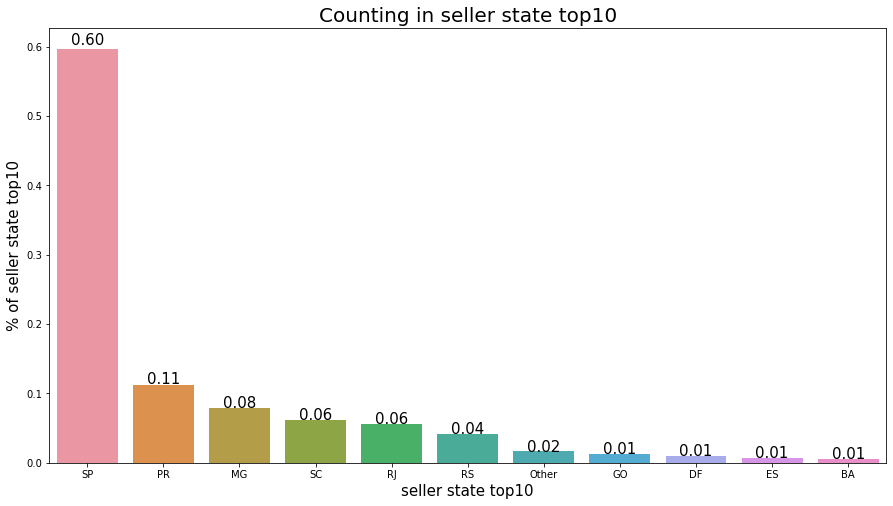

In [47]:
plot_count_col(olist_sellers_dataset, col= 'seller_state_top10', label_col='seller state top10', show_val=True)

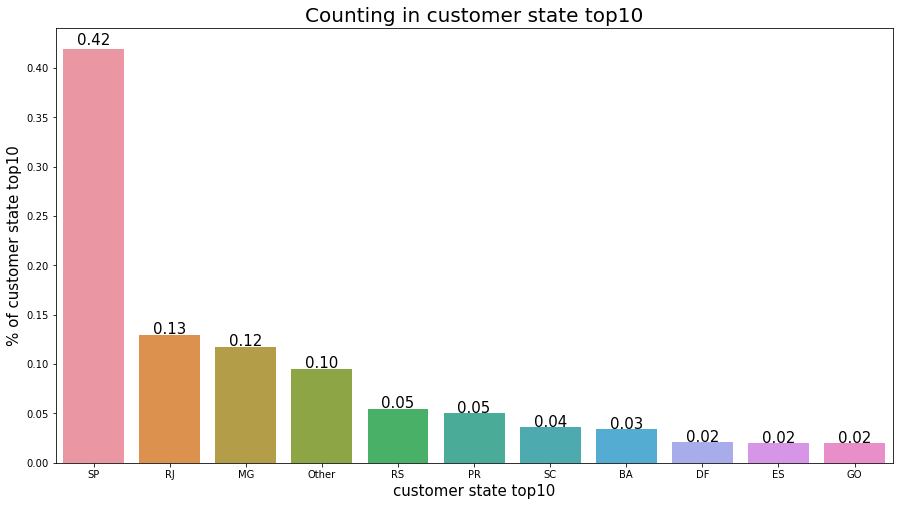

In [48]:
plot_count_col(olist_customers_dataset, col= 'customer_state_top10', label_col='customer state top10', show_val=True)

# Aggregation by `client_id_unique` and preparing dataset

## Merging the dataset

After exploring and performing preprocessing on the datasets individually, we merge the datasets using multiple merge functions and common keys from the database schema. We use the 'inner' join strategy to avoid any missing values.

In [49]:
df = pd.merge(olist_orders_dataset, olist_order_payments_dataset, on='order_id', how='inner')
df = df.merge(olist_order_reviews_dataset, on='order_id', how='inner')
df = df.merge(olist_customers_dataset, on='customer_id', how='inner')
df = df.merge(olist_order_items_dataset, on='order_id', how='inner')
df = df.merge(olist_products_dataset, on='product_id', how='inner')
df = df.merge(olist_sellers_dataset, on='seller_id', how='inner')
df = df.merge(olist_geolocation_dataset, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

Merging the dataset could cause some creation of dupplicates. So we clean the obtained dataset by removing the duplicates.

In [50]:
# dropping duplicate values
#cols = list(df.columns)
#cols.remove('geolocation_lat')
#cols.remove('geolocation_lng')
df = df.drop_duplicates(subset=['order_id', 'customer_id', 'review_id', 'order_item_id', 'product_id', 'seller_id'])

In [51]:
missing_values_table(df)

Your selected dataframe has 52 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

## Aggregation by `client_id_unique`

The dataset is know merged, and know we shall agregate it by `client_id_unique` in order to make the clients segmentation.

In [79]:
import scipy
bb_aggregations = {
    #'product_id': ['count'], #number of buyed products
    'order_id': ['count'], #number of orders per client
    #'payment_type': ['nunique'], # number of payment type
    'payment_type':  lambda x: scipy.stats.mode(x)[0], # payment le plus utilisé par le client
    'payment_value': ['sum'],#, 'mean', 'max'], # La somme totale de payment par client et la moyenne de depesement par client
    'payment_sequential':['max'], # Sequential payment for a customer, what is the maximum number of the payment methods used in one order by the customer
    'payment_installments':['max'], #, 'mean', 'min'], # the maximum, mean and the minimum payment installments per client 
    'review_score': ['max'], #['max', 'min', 'count'], #La score maximale, minimale, et le nombre des scores donné par le client
    'price': ['mean'], #, 'mean', 'max'], #Price total mean, maximum of purcheased per customer
    'freight_value': ['sum'], #, 'max', 'min', 'mean'], # the total sum, the maximum, minimum and the mean for the freight value per customer
    'product_weight_g': ['mean'], #['min', 'mean', 'max' ], # the minimum, mean and the maximum weight in g of prodcuts per customer
    'product_length_cm': ['mean'], #['min', 'mean', 'max'], # the minimum, mean and the maximum length in g of prodcuts per customer
    'product_height_cm': ['mean'], #['min', 'mean', 'max'], # the minimum, mean and the maximum height in g of prodcuts per customer
    'product_width_cm': ['mean'], #['min', 'mean', 'max'], # the minimum, mean and the maximum width in g of prodcuts per customer
    
    
    #'product_category_name_en':  lambda x: scipy.stats.mode(x)[0], #['mode'] the most used product category name for the customer
    'my_categoty':  lambda x: scipy.stats.mode(x)[0], #the most used product category name for the customer
    #'seller_city': lambda x: scipy.stats.mode(x)[0], # the most used seller city name for the customer
    
    'customer_state_top10': lambda x: scipy.stats.mode(x)[0],# the customer state name for the customer
    'seller_state_top10': lambda x: scipy.stats.mode(x)[0], # the most used seller state name for the customer
    'geolocation_lat':['mean'], # the mean of geolocalisation latitude per customer
    'geolocation_lng':['mean'], # the mean of geolocalisation longitude per customer
    
    
    #'diff_app_pur':['min', 'mean', 'max' ], # the minimum, mean and the maximum of the difference between the time the order was placed and the time it was approved in seconds per customer this was deleted because this seems to be 0
    'diff_car_app':['mean'], # the minimum, mean and the maximum of the difference between the time the order was approved and the time the order was delivered to the logistic partner in days per customer
    'diff_del_car':['mean'], # the minimum, mean and the maximum the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days per customer
    'diff_est_act':['mean' ], # the minimum, mean and the maximum the difference between the estimated date of arrival and the actual date of arrival in days per client
    'diff_cust_pur':['mean'], # the minimum, mean and the maximum the difference between the time the order was made and the current date per customer
}

df_clients = df.groupby('customer_unique_id').agg(bb_aggregations)
col_name = pd.Index([e[0] + "_" + e[1].upper().replace('<', '').replace('>', '') for e in df_clients.columns.tolist()])
df_clients.columns = col_name

df_clients = df_clients.reset_index()

## Analysing and cleaning the obtained data

In [80]:
df_clients.describe()

order_id_COUNT  payment_value_SUM  payment_sequential_MAX  \
count    91228.000000       91228.000000            91228.000000   
mean         1.078485         173.516699                1.022811   
std          0.363229         265.253795                0.235734   
min          1.000000           0.010000                1.000000   
25%          1.000000          61.640000                1.000000   
50%          1.000000         106.970000                1.000000   
75%          1.000000         186.560000                1.000000   
max         14.000000       15978.650000               19.000000   

       payment_installments_MAX  review_score_MAX    price_MEAN  \
count              91228.000000      91228.000000  91228.000000   
mean                   2.926316          4.165662    125.745473   
std                    2.718176          1.277450    188.781650   
min                    1.000000          1.000000      0.850000   
25%                    1.000000          4.000000     42.900000   
50%                    2.000000          5.000000     79.000000   
75%                    4.000000          5.000000    139.900000   
max                   24.000000          5.000000   6735.000000   

       freight_value_SUM  product_weight_g_MEAN  product_length_cm_MEAN  \
count       91228.000000           91228.000000            91228.000000   
mean           21.657189            2106.442156               30.121509   
std            18.073440            3730.776235               15.983925   
min             0.000000               0.000000                7.000000   
25%            13.610000             300.000000               18.000000   
50%            16.870000             700.000000               25.000000   
75%            23.100000            1825.000000               38.000000   
max          1002.290000           40425.000000              105.000000   

       product_height_cm_MEAN  product_width_cm_MEAN  geolocation_lat_MEAN  \
count            91228.000000           91228.000000          91228.000000   
mean                16.500057              23.037272            -21.193864   
std                 13.233714              11.622696              5.622003   
min                  2.000000               6.000000            -36.605374   
25%                  8.000000              15.000000            -23.590239   
50%                 13.000000              20.000000            -22.925875   
75%                 20.000000              30.000000            -20.134916   
max                105.000000             118.000000             42.184003   

       geolocation_lng_MEAN  diff_car_app_MEAN  diff_del_car_MEAN  \
count          91228.000000       91228.000000       91228.000000   
mean             -46.190034           2.685258           9.252893   
std                4.066379           3.495005           8.699723   
min              -72.666706        -171.000000         -16.000000   
25%              -48.122847           1.000000           4.000000   
50%              -46.632588           2.000000           7.000000   
75%              -43.627849           3.000000          12.000000   
max               -8.577855         107.000000         205.000000   

       diff_est_act_MEAN  diff_cust_pur_MEAN  
count       91228.000000        91228.000000  
mean           11.897514          238.913352  
std            10.067212          152.341822  
min          -188.000000            1.000000  
25%             7.000000          115.000000  
50%            12.000000          220.000000  
75%            17.000000          347.000000  
max           147.000000          696.000000

In [81]:
df_clients.head()

customer_unique_id  order_id_COUNT payment_type_LAMBDA  \
0  0000366f3b9a7992bf8c76cfdf3221e2               1         credit_card   
1  0000b849f77a49e4a4ce2b2a4ca5be3f               1         credit_card   
2  0000f46a3911fa3c0805444483337064               1         credit_card   
3  0000f6ccb0745a6a4b88665a16c9f078               1         credit_card   
4  0004aac84e0df4da2b147fca70cf8255               1         credit_card   

   payment_value_SUM  payment_sequential_MAX  payment_installments_MAX  \
0             141.90                       1                         8   
1              27.19                       1                         1   
2              86.22                       1                         8   
3              43.62                       1                         4   
4             196.89                       1                         6   

   review_score_MAX  price_MEAN  freight_value_SUM  product_weight_g_MEAN  \
0                 5      129.90              12.00                 1500.0   
1                 4       18.90               8.29                  375.0   
2                 3       69.00              17.22                 1500.0   
3                 4       25.99              17.63                  150.0   
4                 5      180.00              16.89                 6050.0   

   ...  product_width_cm_MEAN  my_categoty_LAMBDA  \
0  ...                   32.0         home_layout   
1  ...                   18.0       personal_care   
2  ...                   35.0           telephony   
3  ...                   11.0           telephony   
4  ...                   11.0           telephony   

   customer_state_top10_LAMBDA seller_state_top10_LAMBDA geolocation_lat_MEAN  \
0                           SP                        SP           -23.335331   
1                           SP                        SP           -23.567395   
2                           SC                        SP           -27.543787   
3                        Other                        SP            -1.311011   
4                           SP                        SP           -23.504368   

  geolocation_lng_MEAN  diff_car_app_MEAN  diff_del_car_MEAN  \
0           -46.828647                2.0                4.0   
1           -46.792957                2.0                1.0   
2           -48.625680                3.0               23.0   
3           -48.482884                1.0               19.0   
4           -47.466156                2.0               11.0   

   diff_est_act_MEAN  diff_cust_pur_MEAN  
0                5.0               112.0  
1                5.0               115.0  
2                2.0               538.0  
3               12.0               322.0  
4                8.0               289.0  

[5 rows x 22 columns]

In [82]:
#cols = [ 'payment_value_SUM', 'review_score_MAX', 'price_SUM', 'product_width_cm_MAX',  'diff_car_app_MAX','diff_del_car_MAX', 'diff_est_act_MAX',  'diff_cust_pur_MAX' ]

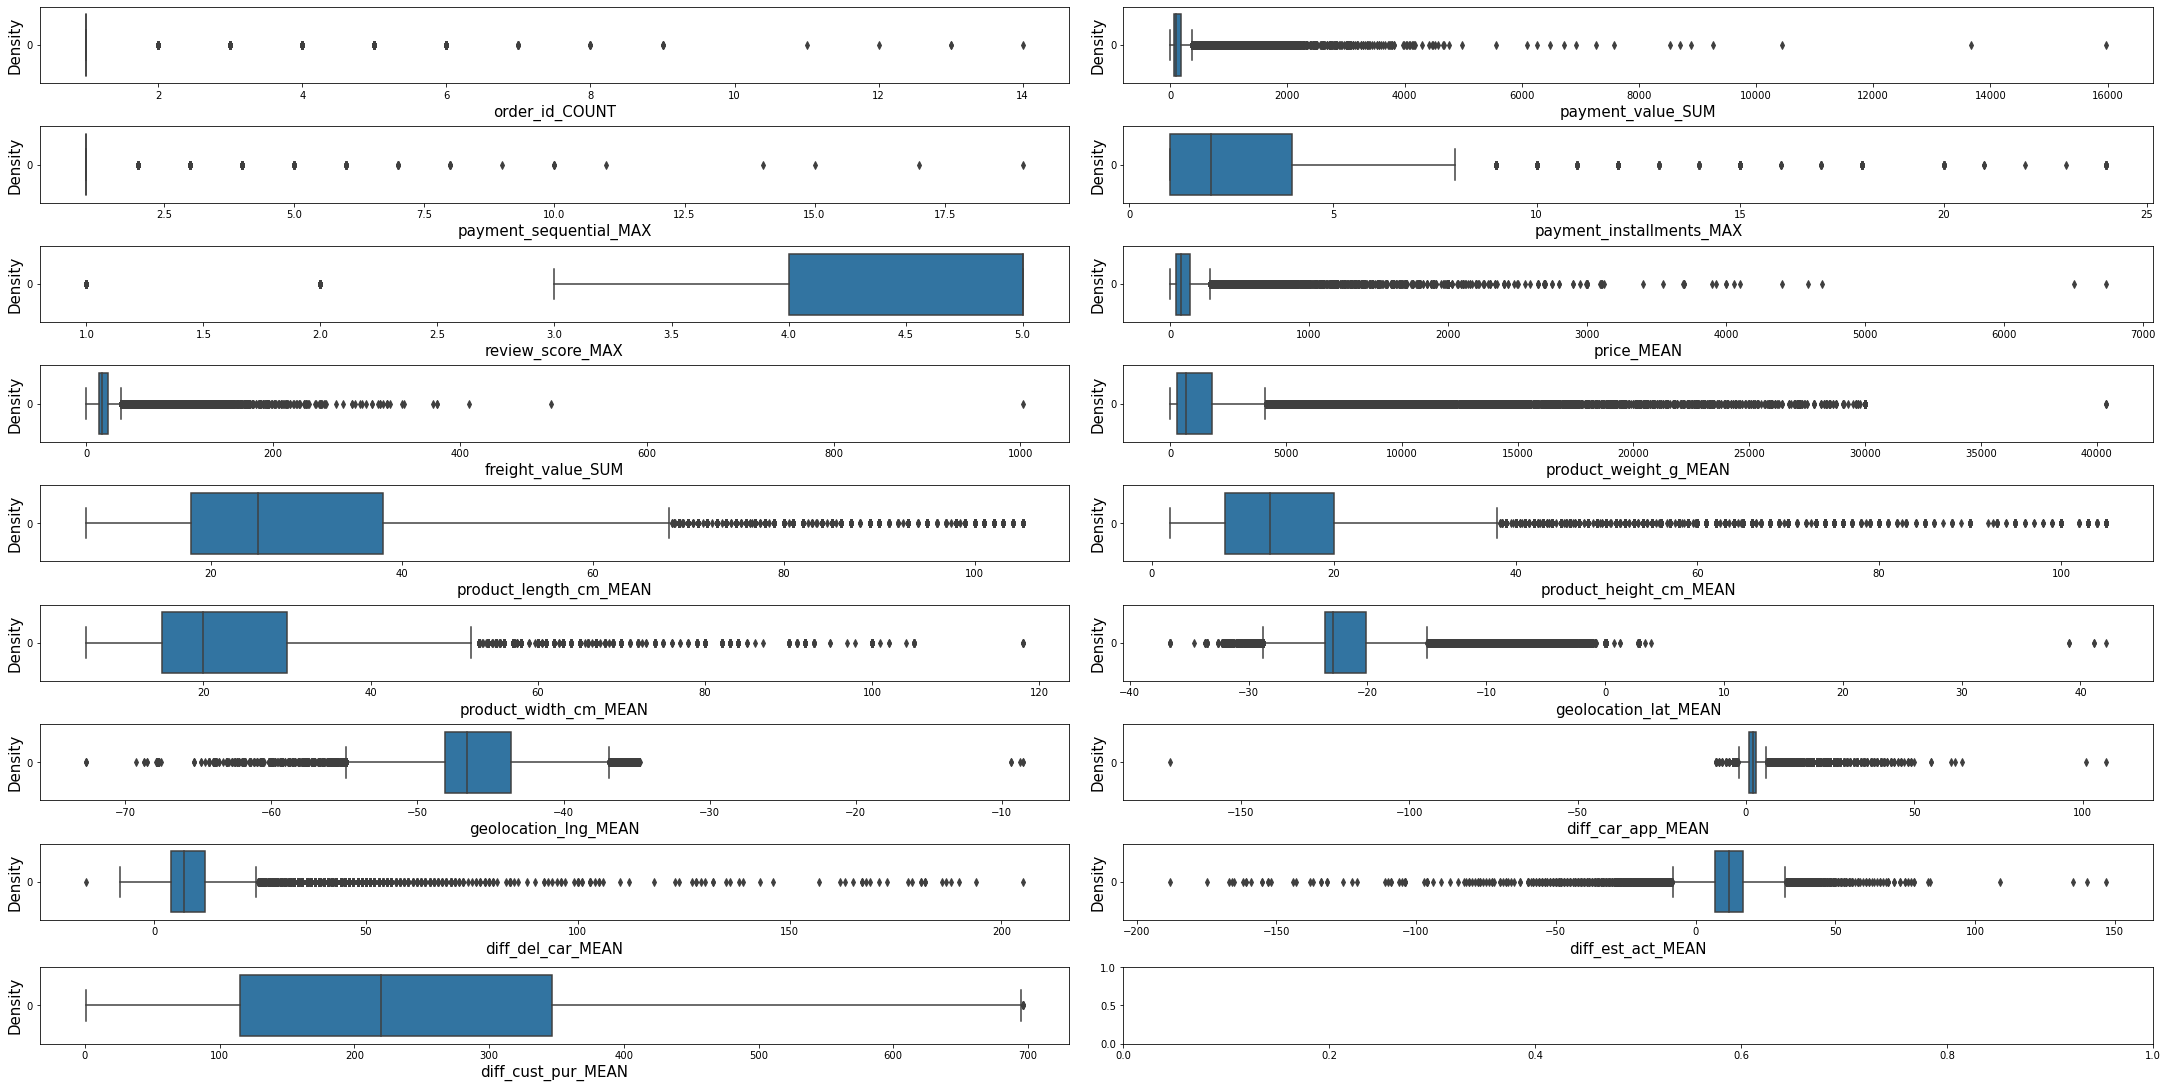

In [83]:
plot_density(df_clients,  dt = DensityTypes.Boxplot)

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

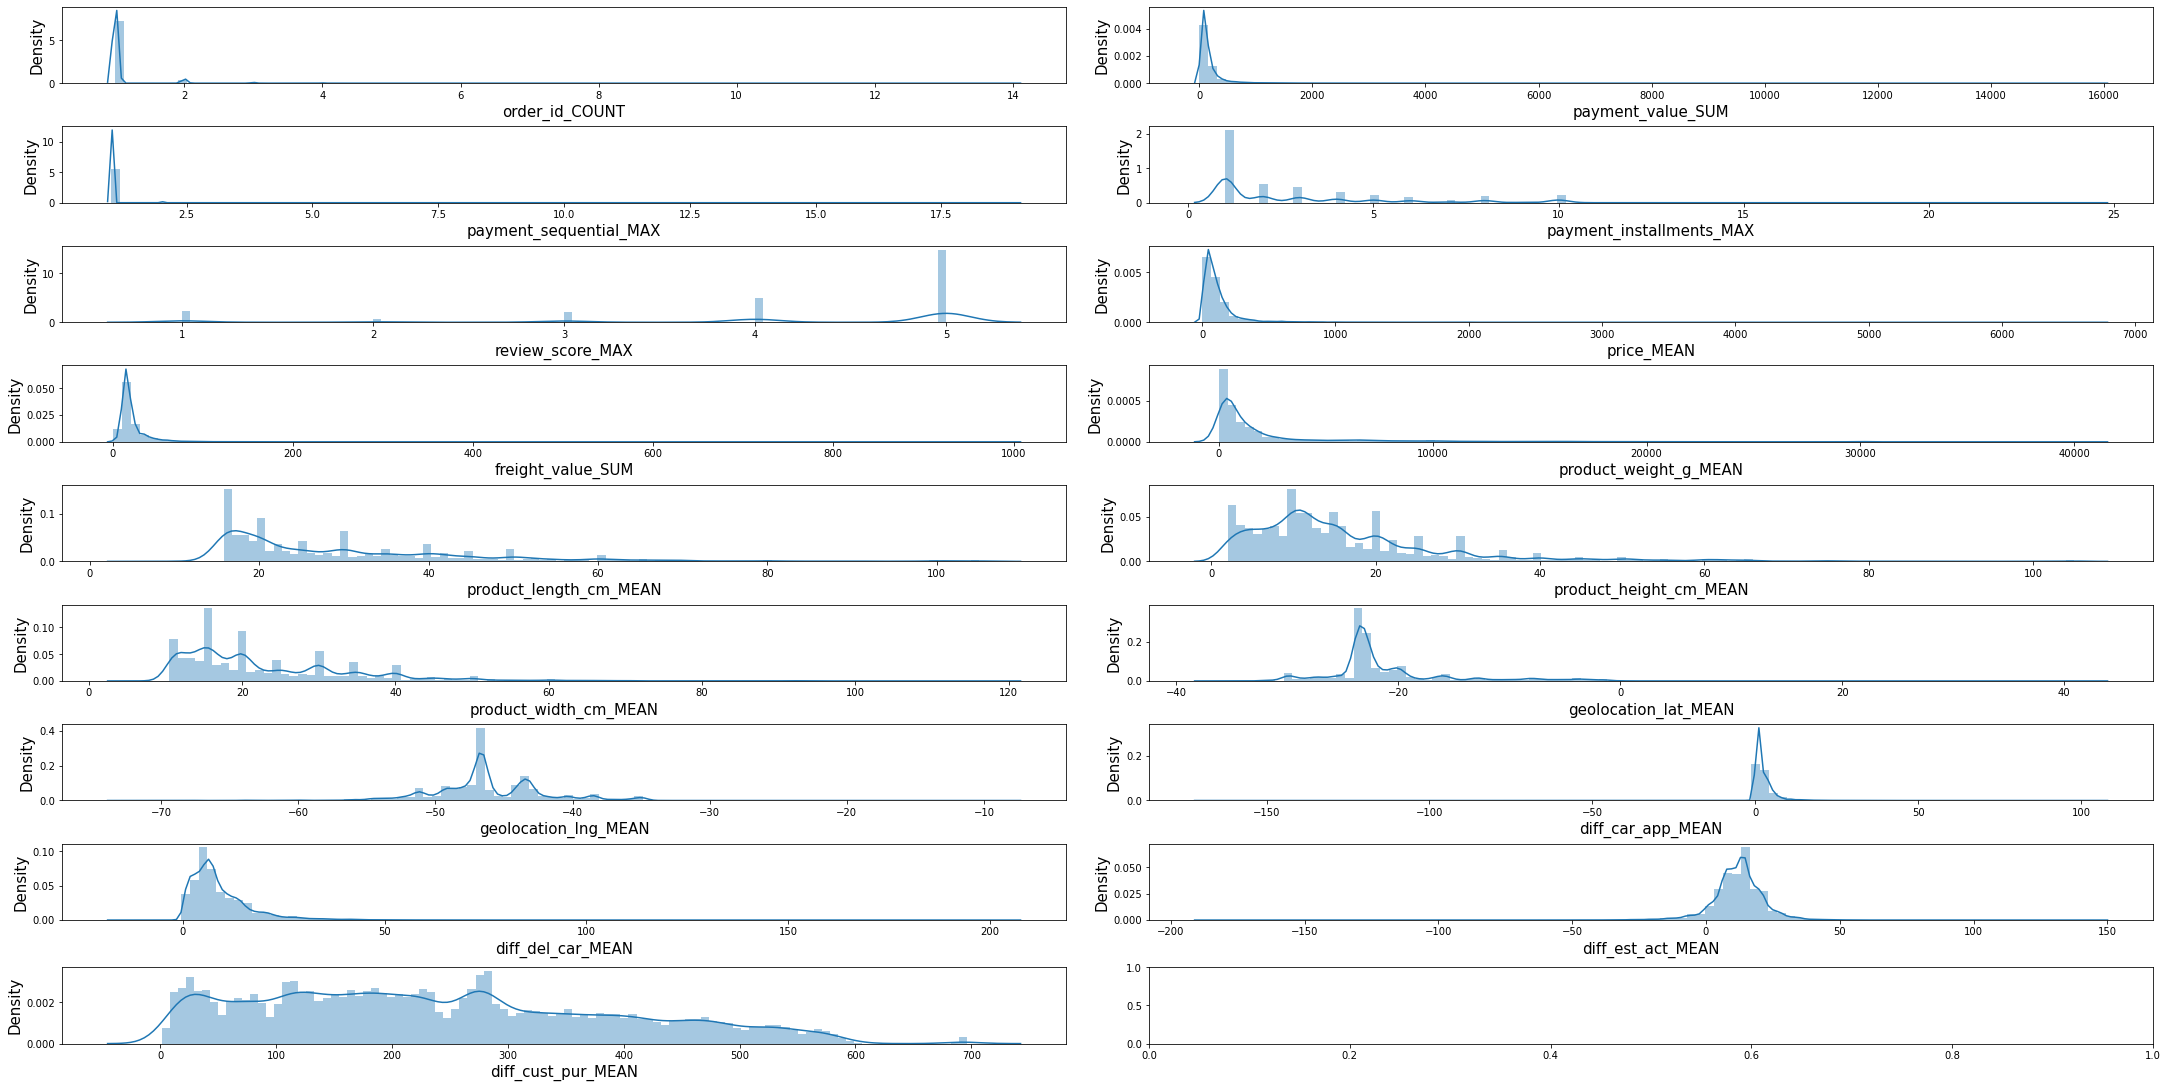

In [84]:
plot_density(df_clients, dt = DensityTypes.Density)

Here we observe that `diff_car_app_MAX` the difference between the time the order was approved and the time the order was delivered to the logistic partner in days has negative values meaning the order was approved before it was delivered to the logistic partner. This is not logic so cleaning this data might be logic.
Now `diff_del_car_MAX` the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days can't be less then 0. Meaning that the delivering date to the customer must be greater than delivering date to logistic partner.
Also observe that `diff_est_act` that is the difference between the estimated date of arrival and the actual date of arrival in days can be negative, meaning that the product was delivered much faster.

In [85]:
df_clients = df_clients[df_clients['diff_car_app_MEAN'] >= 0]
df_clients = df_clients[df_clients['diff_del_car_MEAN'] >= 0]
df_clients = df_clients.reset_index(drop=True)

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

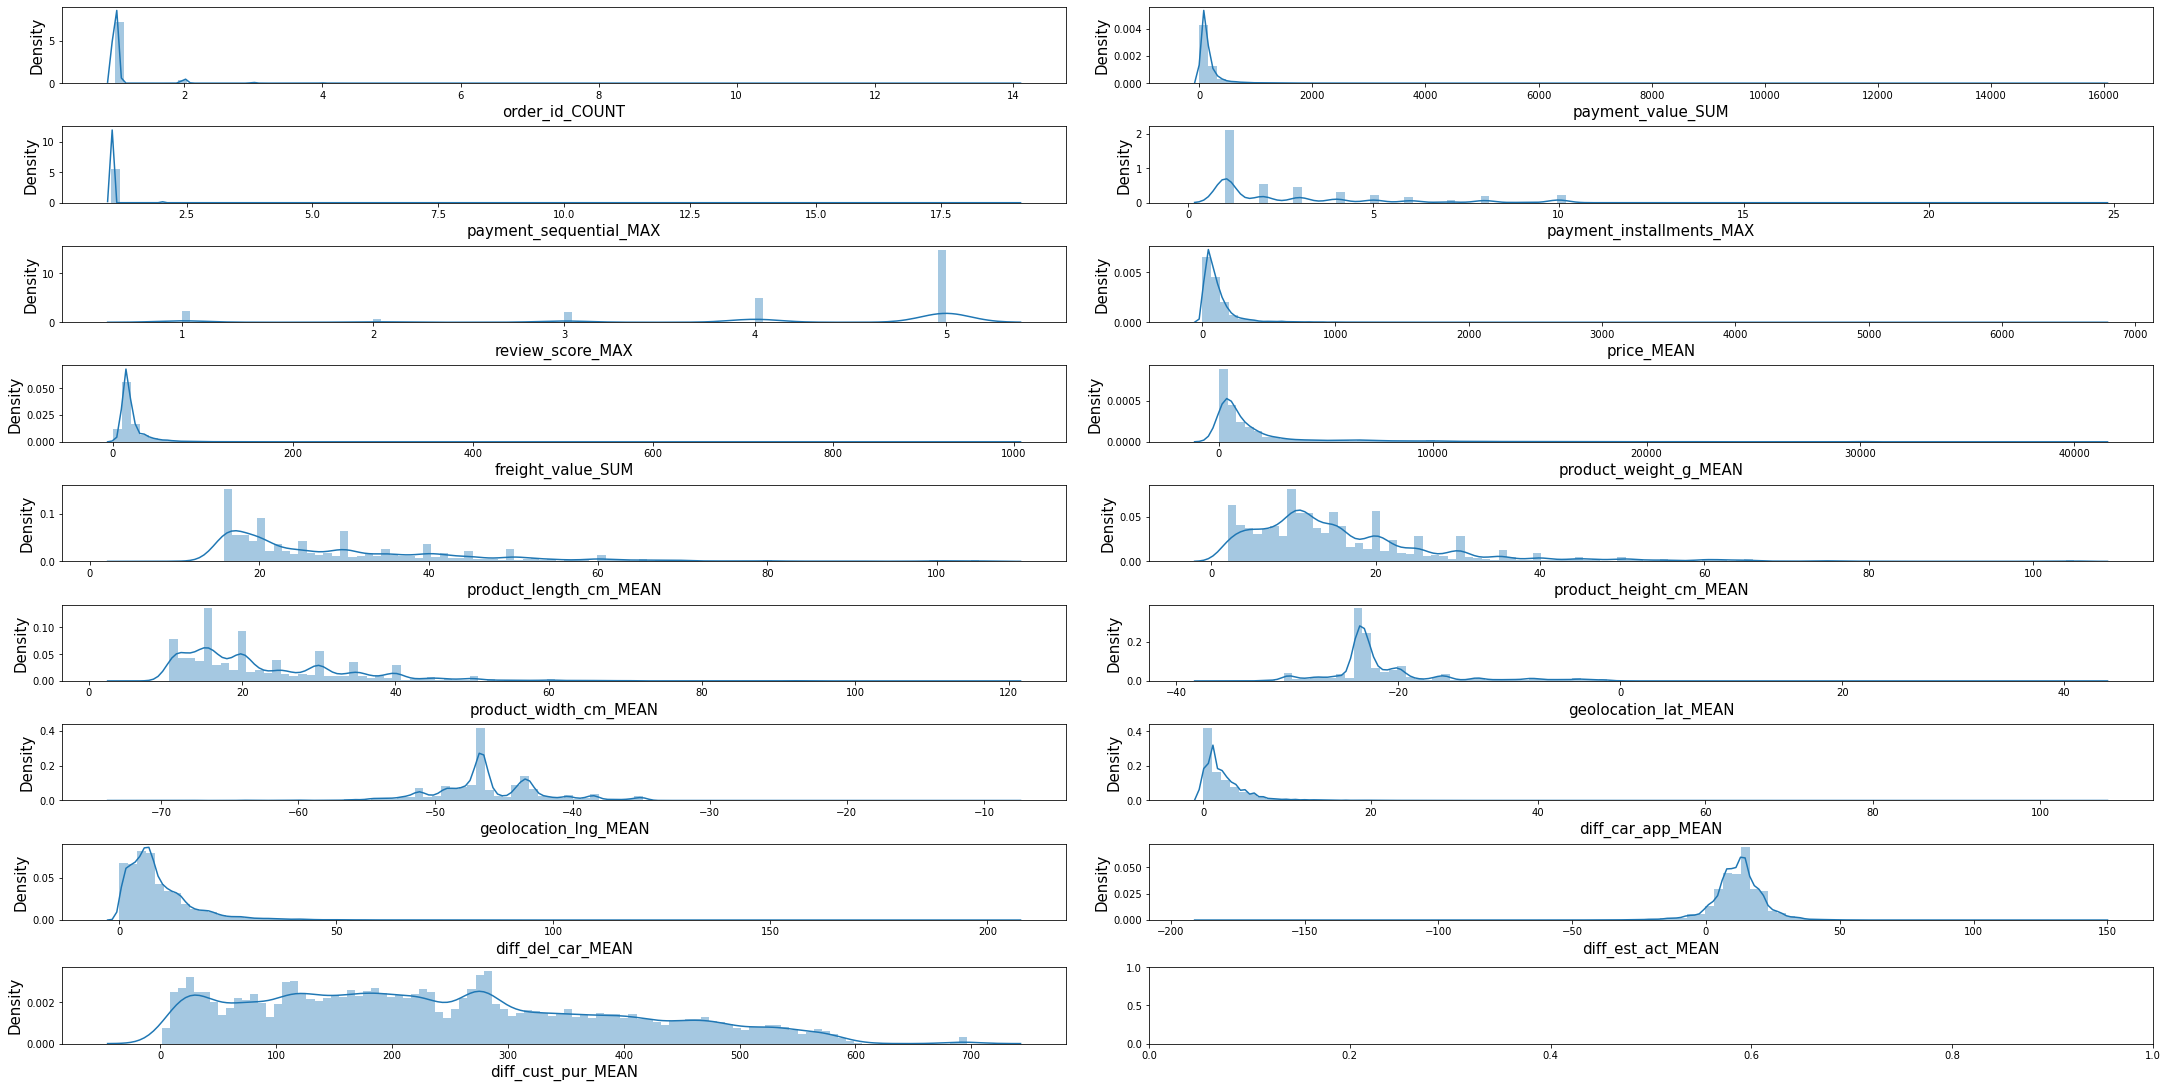

In [86]:
plot_density(df_clients, dt = DensityTypes.Density)

## Polynomial Features on the aggregated data

In [87]:
df_clients.columns

Index(['customer_unique_id', 'order_id_COUNT', 'payment_type_LAMBDA',
       'payment_value_SUM', 'payment_sequential_MAX',
       'payment_installments_MAX', 'review_score_MAX', 'price_MEAN',
       'freight_value_SUM', 'product_weight_g_MEAN', 'product_length_cm_MEAN',
       'product_height_cm_MEAN', 'product_width_cm_MEAN', 'my_categoty_LAMBDA',
       'customer_state_top10_LAMBDA', 'seller_state_top10_LAMBDA',
       'geolocation_lat_MEAN', 'geolocation_lng_MEAN', 'diff_car_app_MEAN',
       'diff_del_car_MEAN', 'diff_est_act_MEAN', 'diff_cust_pur_MEAN'],
      dtype='object')

In [88]:
cols = ['order_id_COUNT', 'payment_value_SUM', 'review_score_MAX',  'diff_car_app_MEAN', 'diff_del_car_MEAN',
       'diff_est_act_MEAN', 'diff_cust_pur_MEAN']
# Make a new dataframe for polynomial features
poly_features = df_clients[cols]

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)

# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(cols))



PolynomialFeatures(degree=3)

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [89]:
df_clients.head()

customer_unique_id  order_id_COUNT payment_type_LAMBDA  \
0  0000366f3b9a7992bf8c76cfdf3221e2               1         credit_card   
1  0000b849f77a49e4a4ce2b2a4ca5be3f               1         credit_card   
2  0000f46a3911fa3c0805444483337064               1         credit_card   
3  0000f6ccb0745a6a4b88665a16c9f078               1         credit_card   
4  0004aac84e0df4da2b147fca70cf8255               1         credit_card   

   payment_value_SUM  payment_sequential_MAX  payment_installments_MAX  \
0             141.90                       1                         8   
1              27.19                       1                         1   
2              86.22                       1                         8   
3              43.62                       1                         4   
4             196.89                       1                         6   

   review_score_MAX  price_MEAN  freight_value_SUM  product_weight_g_MEAN  \
0                 5      129.90              12.00                 1500.0   
1                 4       18.90               8.29                  375.0   
2                 3       69.00              17.22                 1500.0   
3                 4       25.99              17.63                  150.0   
4                 5      180.00              16.89                 6050.0   

   ...  product_width_cm_MEAN  my_categoty_LAMBDA  \
0  ...                   32.0         home_layout   
1  ...                   18.0       personal_care   
2  ...                   35.0           telephony   
3  ...                   11.0           telephony   
4  ...                   11.0           telephony   

   customer_state_top10_LAMBDA seller_state_top10_LAMBDA geolocation_lat_MEAN  \
0                           SP                        SP           -23.335331   
1                           SP                        SP           -23.567395   
2                           SC                        SP           -27.543787   
3                        Other                        SP            -1.311011   
4                           SP                        SP           -23.504368   

  geolocation_lng_MEAN  diff_car_app_MEAN  diff_del_car_MEAN  \
0           -46.828647                2.0                4.0   
1           -46.792957                2.0                1.0   
2           -48.625680                3.0               23.0   
3           -48.482884                1.0               19.0   
4           -47.466156                2.0               11.0   

   diff_est_act_MEAN  diff_cust_pur_MEAN  
0                5.0               112.0  
1                5.0               115.0  
2                2.0               538.0  
3               12.0               322.0  
4                8.0               289.0  

[5 rows x 22 columns]

In [92]:
df_clients.shape

(90563, 22)

In [95]:
poly_features.shape

(90563, 120)

In [96]:
df_clients = pd.concat([df_clients, poly_features], axis=1)
df_clients.shape

(90563, 142)

In [97]:
if '1' in df_clients.columns:
    df_clients = df_clients.drop(columns=['1'])

In [98]:
df_clients.columns

Index(['customer_unique_id', 'order_id_COUNT', 'payment_type_LAMBDA',
       'payment_value_SUM', 'payment_sequential_MAX',
       'payment_installments_MAX', 'review_score_MAX', 'price_MEAN',
       'freight_value_SUM', 'product_weight_g_MEAN',
       ...
       'diff_del_car_MEAN^3', 'diff_del_car_MEAN^2 diff_est_act_MEAN',
       'diff_del_car_MEAN^2 diff_cust_pur_MEAN',
       'diff_del_car_MEAN diff_est_act_MEAN^2',
       'diff_del_car_MEAN diff_est_act_MEAN diff_cust_pur_MEAN',
       'diff_del_car_MEAN diff_cust_pur_MEAN^2', 'diff_est_act_MEAN^3',
       'diff_est_act_MEAN^2 diff_cust_pur_MEAN',
       'diff_est_act_MEAN diff_cust_pur_MEAN^2', 'diff_cust_pur_MEAN^3'],
      dtype='object', length=141)

In [99]:
col_name = pd.Index([e.replace('^', '').replace(' ', '') for e in df_clients.columns.tolist()])
df_clients.columns = col_name

In [100]:
df_clients.columns

Index(['customer_unique_id', 'order_id_COUNT', 'payment_type_LAMBDA',
       'payment_value_SUM', 'payment_sequential_MAX',
       'payment_installments_MAX', 'review_score_MAX', 'price_MEAN',
       'freight_value_SUM', 'product_weight_g_MEAN',
       ...
       'diff_del_car_MEAN3', 'diff_del_car_MEAN2diff_est_act_MEAN',
       'diff_del_car_MEAN2diff_cust_pur_MEAN',
       'diff_del_car_MEANdiff_est_act_MEAN2',
       'diff_del_car_MEANdiff_est_act_MEANdiff_cust_pur_MEAN',
       'diff_del_car_MEANdiff_cust_pur_MEAN2', 'diff_est_act_MEAN3',
       'diff_est_act_MEAN2diff_cust_pur_MEAN',
       'diff_est_act_MEANdiff_cust_pur_MEAN2', 'diff_cust_pur_MEAN3'],
      dtype='object', length=141)

Know we will see the correlation between the created variables and try to simplify the dataset by removing the features with high corelation between each other.

In [101]:
df_clients_corr = df_clients.corr()

<Figure size 2160x1440 with 0 Axes>

<AxesSubplot:>

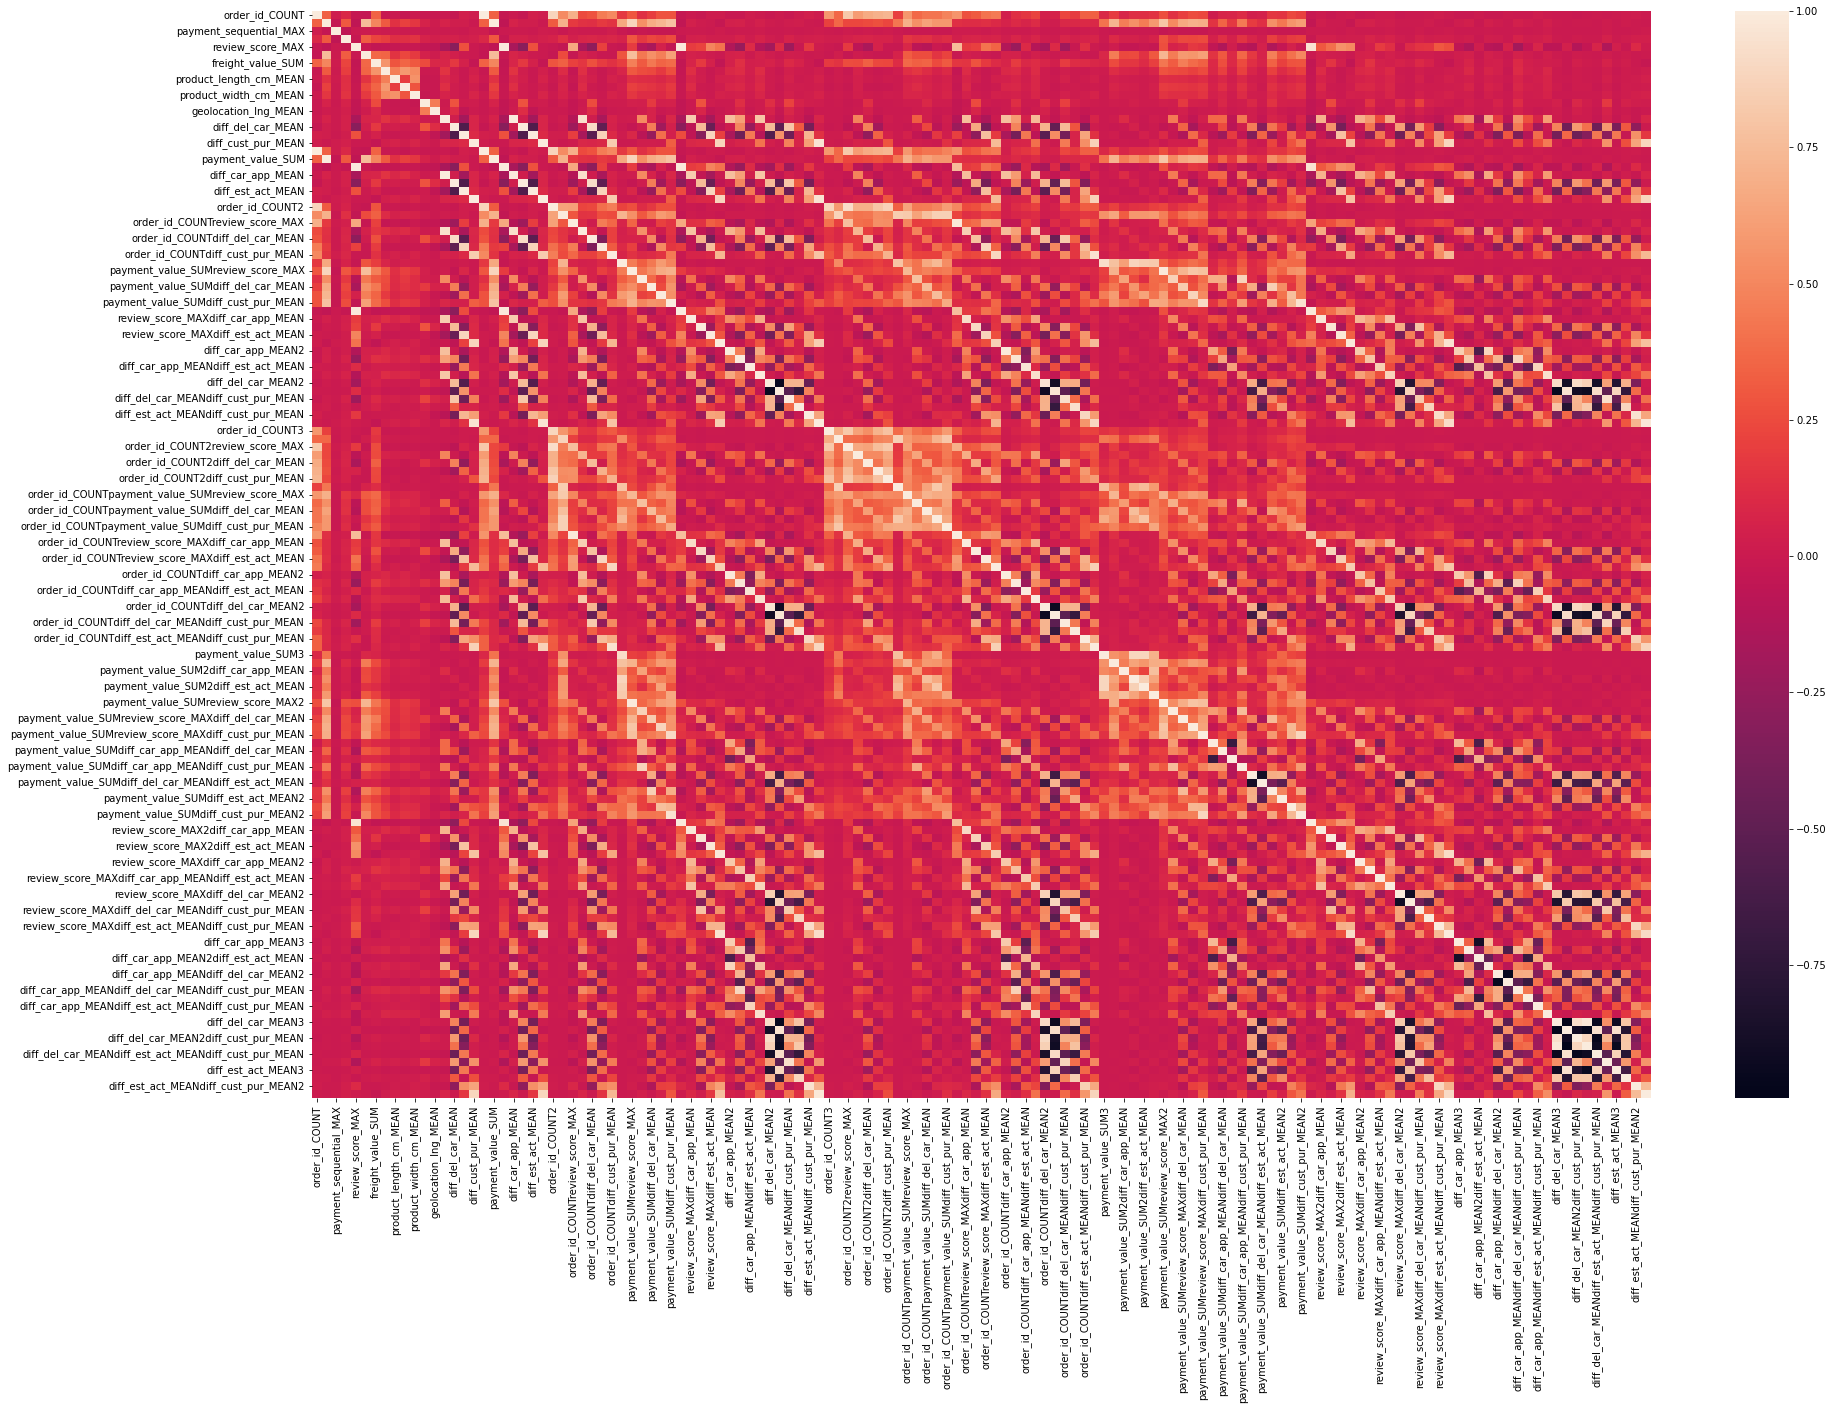

In [102]:
plt.figure(figsize=(30,20))
sns.heatmap(df_clients_corr)

In [103]:
df_clients.shape

(90563, 141)

In [104]:
df_clients = remove_columns_regarding_correlation(df_clients, df_clients_corr, hdc_make=False, hc_make=True)

In [105]:
df_clients.shape

(90563, 96)

<Figure size 2160x1440 with 0 Axes>

<AxesSubplot:>

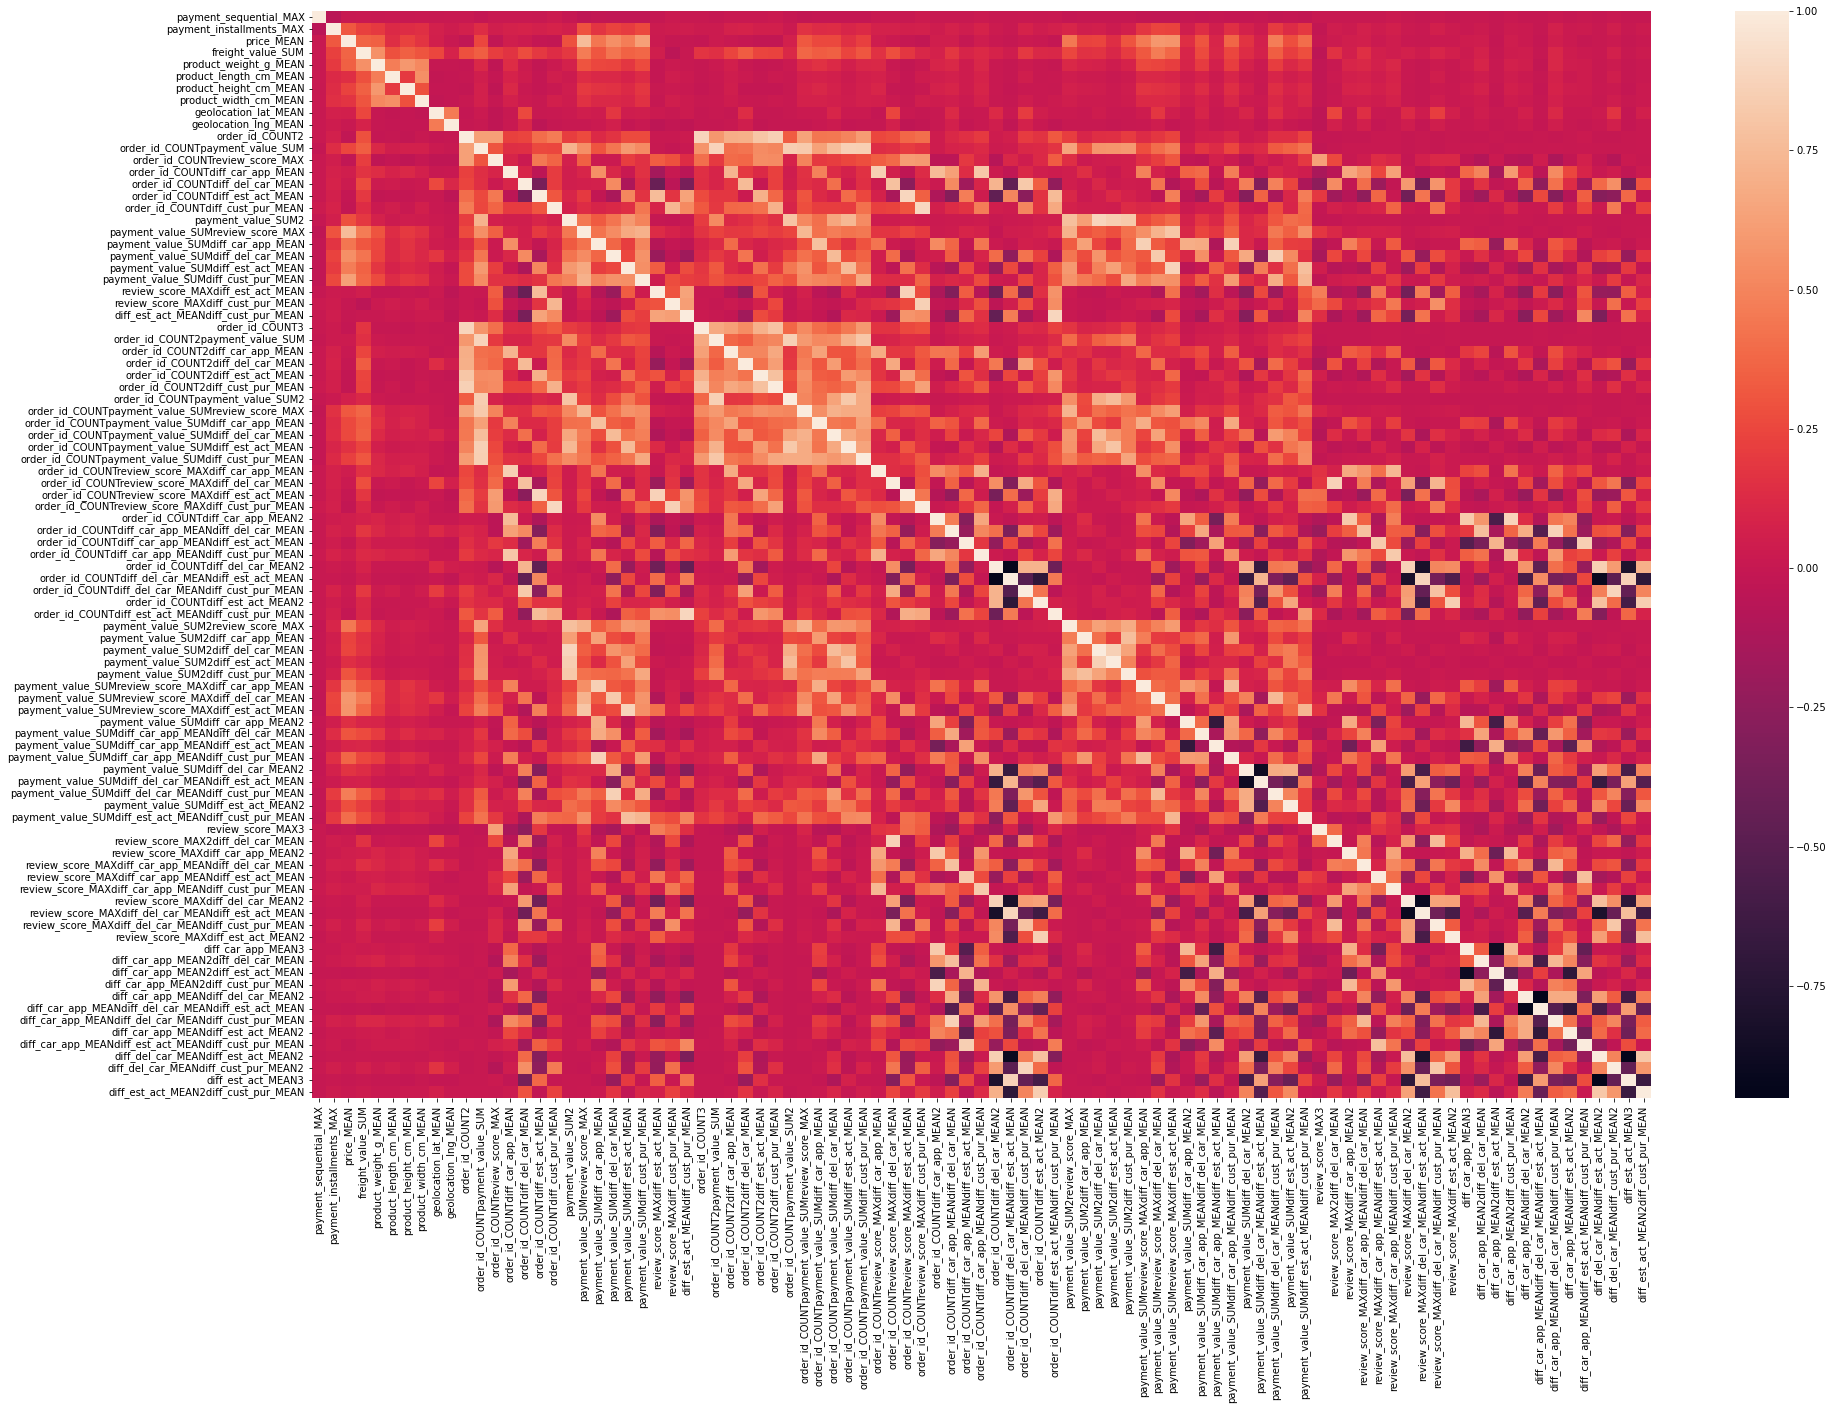

In [106]:
plt.figure(figsize=(30,20))
sns.heatmap(df_clients.corr())

In [107]:
plot_correlation(df_clients)

In [108]:
for col in df_clients.columns:
    print('There are {0} nan values in the {1} mode variable'.format(len(df_clients[df_clients[col].isna()]), col))

There are 0 nan values in the customer_unique_id mode variable
There are 0 nan values in the payment_type_LAMBDA mode variable
There are 0 nan values in the payment_sequential_MAX mode variable
There are 0 nan values in the payment_installments_MAX mode variable
There are 0 nan values in the price_MEAN mode variable
There are 0 nan values in the freight_value_SUM mode variable
There are 0 nan values in the product_weight_g_MEAN mode variable
There are 0 nan values in the product_length_cm_MEAN mode variable
There are 0 nan values in the product_height_cm_MEAN mode variable
There are 0 nan values in the product_width_cm_MEAN mode variable
There are 0 nan values in the my_categoty_LAMBDA mode variable
There are 0 nan values in the customer_state_top10_LAMBDA mode variable
There are 0 nan values in the seller_state_top10_LAMBDA mode variable
There are 0 nan values in the geolocation_lat_MEAN mode variable
There are 0 nan values in the geolocation_lng_MEAN mode variable
There are 0 nan val

# Saving the dataset

In [113]:
#df_clients.to_csv("data/df_clients_poly.csv", index=False)
#df.to_csv("data/df_original.csv", index=False)

# Compare data

In [128]:
df_clients.head()

customer_unique_id payment_type_LAMBDA my_categoty_LAMBDA  \
0  0000366f3b9a7992bf8c76cfdf3221e2         credit_card        home_layout   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         credit_card      personal_care   
2  0000f46a3911fa3c0805444483337064         credit_card        electronics   
3  0000f6ccb0745a6a4b88665a16c9f078         credit_card        electronics   
4  0004aac84e0df4da2b147fca70cf8255         credit_card        electronics   

  customer_state_top10_LAMBDA seller_state_top10_LAMBDA  diff_car_app_MAX  \
0                          SP                        SP                 2   
1                          SP                        SP                 2   
2                          SC                        SP                 3   
3                       Other                        SP                 1   
4                          SP                        SP                 2   

   diff_del_car_MAX  diff_est_act_MAX  diff_cust_pur_MAX  \
0                 4                 5                112   
1                 1                 5                115   
2                23                 2                538   
3                19                12                322   
4                11                 8                289   

   payment_value_SUMpayment_sequential_MAX  ...  \
0                                   141.90  ...   
1                                    27.19  ...   
2                                    86.22  ...   
3                                    43.62  ...   
4                                   196.89  ...   

   product_length_cm_MAX2geolocation_lat_MEAN  \
0                               -26975.643149   
1                               -15931.558984   
2                               -17214.866662   
3                                 -473.275125   
4                                -6017.118241   

   product_length_cm_MAXproduct_height_cm_MAXproduct_width_cm_MAX  \
0                                             7616.0                
1                                             5148.0                
2                                            43750.0                
3                                             1045.0                
4                                              528.0                

   product_length_cm_MAXproduct_height_cm_MAXgeolocation_lng_MEAN  \
0                                      -11145.218027                
1                                      -13382.785839                
2                                      -60782.099533                
3                                       -4605.873961                
4                                       -2278.375502                

   product_length_cm_MAXproduct_width_cm_MAXgeolocation_lat_MEAN  \
0                                      -25388.840610               
1                                      -11029.540835               
2                                      -24100.813326               
3                                        -274.001388               
4                                       -4136.768791               

   product_height_cm_MAX2geolocation_lng_MEAN  \
0                                -2294.603712   
1                                -5661.947855   
2                              -121564.199065   
3                                -1212.072095   
4                                 -427.195407   

   product_height_cm_MAXproduct_width_cm_MAXgeolocation_lat_MEAN  \
0                                       -5227.114243               
1                                       -4666.344199               
2                                      -48201.626653               
3                                         -72.105628               
4                                        -775.644148               

   product_height_cm_MAXgeolocation_lat_MEANgeolocation_lng_MEAN  \
0                                        7649.334020               
1                                       121

In [130]:
df_clients2 = pd.read_csv("data/df_clients.csv")

In [131]:
df_clients2.head()

customer_unique_id payment_type_LAMBDA  payment_value_SUM  \
0  0000366f3b9a7992bf8c76cfdf3221e2         credit_card             141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         credit_card              27.19   
2  0000f46a3911fa3c0805444483337064         credit_card              86.22   
3  0000f6ccb0745a6a4b88665a16c9f078         credit_card              43.62   
4  0004aac84e0df4da2b147fca70cf8255         credit_card             196.89   

   payment_sequential_MAX  payment_installments_MAX  review_score_MAX  \
0                       1                         8                 5   
1                       1                         1                 4   
2                       1                         8                 3   
3                       1                         4                 4   
4                       1                         6                 5   

   review_score_COUNT  price_SUM  freight_value_SUM  product_weight_g_MAX  \
0                   1     129.90              12.00                1500.0   
1                   1      18.90               8.29                 375.0   
2                   1      69.00              17.22                1500.0   
3                   1      25.99              17.63                 150.0   
4                   1     180.00              16.89                6050.0   

   ...  product_width_cm_MAX  my_categoty_LAMBDA  customer_state_top10_LAMBDA  \
0  ...                  32.0         home_layout                           SP   
1  ...                  18.0       personal_care                           SP   
2  ...                  35.0         electronics                           SC   
3  ...                  11.0         electronics                        Other   
4  ...                  11.0         electronics                           SP   

  seller_state_top10_LAMBDA geolocation_lat_MEAN geolocation_lng_MEAN  \
0                        SP           -23.335331           -46.828647   
1                        SP           -23.567395           -46.792957   
2                        SP           -27.543787           -48.625680   
3                        SP            -1.311011           -48.482884   
4                        SP           -23.504368           -47.466156   

   diff_car_app_MAX  diff_del_car_MAX  diff_est_act_MAX  diff_cust_pur_MAX  
0                 2                 4                 5                112  
1                 2                 1                 5                115  
2                 3                23                 2                538  
3                 1                19                12                322  
4                 2                11                 8                289  

[5 rows x 22 columns]

In [132]:
df_clients2.tail()

customer_unique_id payment_type_LAMBDA  \
76007  fffcf5a5ff07b0908bd4e2dbc735a684         credit_card   
76008  fffea47cd6d3cc0a88bd621562a9d061         credit_card   
76009  ffff371b4d645b6ecea244b27531430a         credit_card   
76010  ffff5962728ec6157033ef9805bacc48         credit_card   
76011  ffffd2657e2aad2907e67c3e9daecbeb         credit_card   

       payment_value_SUM  payment_sequential_MAX  payment_installments_MAX  \
76007            4134.84                       1                        10   
76008              84.58                       1                         1   
76009             112.46                       1                         1   
76010             133.69                       1                         5   
76011              71.56                       1                         4   

       review_score_MAX  review_score_COUNT  price_SUM  freight_value_SUM  \
76007                 5                   2    1570.00             497.42   
76008                 4                   1      64.89              19.69   
76009                 5                   1      89.90              22.56   
76010                 5                   1     115.00              18.69   
76011                 5                   1      56.99              14.57   

       product_weight_g_MAX  ...  product_width_cm_MAX  my_categoty_LAMBDA  \
76007               30000.0  ...                  61.0       personal_care   
76008                1720.0  ...                  27.0                baby   
76009                 600.0  ...                  13.0                auto   
76010                 444.0  ...                  16.0            dressing   
76011                 400.0  ...                  11.0       personal_care   

       customer_state_top10_LAMBDA seller_state_top10_LAMBDA  \
76007                        Other                        SP   
76008                           BA                        SP   
76009                        Other                        MG   
76010                           ES                        SP   
76011                           PR                        SP   

      geolocation_lat_MEAN geolocation_lng_MEAN  diff_car_app_MAX  \
76007            -8.363166           -36.559088                15   
76008           -12.221792           -38.962517                11   
76009           -11.829317           -55.496443                 1   
76010           -21.125061           -41.666268                 1   
76011           -25.456502           -49.435381                 1   

       diff_del_car_MAX  diff_est_act_MAX  diff_cust_pur_MAX  
76007                13                27                448  
76008                19                 3                263  
76009                14                30                569  
76010                11                14                120  
76011                 6                16                485  

[5 rows x 22 columns]

In [133]:
df_clients.tail()

customer_unique_id payment_type_LAMBDA  \
76007  fffcf5a5ff07b0908bd4e2dbc735a684         credit_card   
76008  fffea47cd6d3cc0a88bd621562a9d061         credit_card   
76009  ffff371b4d645b6ecea244b27531430a         credit_card   
76010  ffff5962728ec6157033ef9805bacc48         credit_card   
76011  ffffd2657e2aad2907e67c3e9daecbeb         credit_card   

      my_categoty_LAMBDA customer_state_top10_LAMBDA  \
76007      personal_care                       Other   
76008               baby                          BA   
76009               auto                       Other   
76010           dressing                          ES   
76011      personal_care                          PR   

      seller_state_top10_LAMBDA  diff_car_app_MAX  diff_del_car_MAX  \
76007                        SP                15                13   
76008                        SP                11                19   
76009                        MG                 1                14   
76010                        SP                 1                11   
76011                        SP                 1                 6   

       diff_est_act_MAX  diff_cust_pur_MAX  \
76007                27                448   
76008                 3                263   
76009                30                569   
76010                14                120   
76011                16                485   

       payment_value_SUMpayment_sequential_MAX  ...  \
76007                                  4134.84  ...   
76008                                    84.58  ...   
76009                                   112.46  ...   
76010                                   133.69  ...   
76011                                    71.56  ...   

       product_length_cm_MAX2geolocation_lat_MEAN  \
76007                               -25298.578033   
76008                               -13309.531299   
76009                                -3418.672684   
76010                                -8450.024330   
76011                                -8247.906794   

       product_length_cm_MAXproduct_height_cm_MAXproduct_width_cm_MAX  \
76007                                           251625.0                
76008                                            32076.0                
76009                                             3315.0                
76010                                             4480.0                
76011                                             2178.0                

       product_length_cm_MAXproduct_height_cm_MAXgeolocation_lng_MEAN  \
76007                                     -150806.237195                
76008                                      -46287.469807                
76009                                      -14151.592937                
76010                                      -11666.555021                
76011                                       -9788.205498                

       product_length_cm_MAXproduct_width_cm_MAXgeolocation_lat_MEAN  \
76007                                      -28058.422909               
76008                                      -10889.616517               
76009                                       -2614.279112               
76010                                       -6760.019464               
76011                                       -5040.387485               

       product_height_cm_MAX2geolocation_lng_MEAN  \
76007                              -205644.868902   
76008                               -50495.421608   
76009                               -12486.699650   
76010                                -8166.588515   
76011                                -5981.681138   

       product_height_cm_MAXproduct_width_cm_MAXgeolocation_lat_MEAN  \
76007                                      -38261.485785               
76008                                      -11879.581655               
76009                                       -2306.716863               
76010                            